<a href="https://colab.research.google.com/github/mariaonz/traffic-accidents-analysis-2024/blob/main/traffic_accidents_analysis_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🚦Traffic Accident Analysis in Thailand (2024)

## 📥 Data Preprocessing

## 🎯 Objective:
ในขั้นตอนนี้ เราจะโหลดชุดข้อมูล `accident_file.csv` ซึ่งบันทึกข้อมูลอุบัติเหตุทางถนนในประเทศไทย  
โดยเน้นการวิเคราะห์เชิงเปรียบเทียบเพื่อหา pattern และปัจจัยที่เกี่ยวข้องกับความรุนแรง

ขั้นตอนประกอบด้วย:
1. การตั้งค่าฟอนต์ภาษาไทยสำหรับการแสดงผลกราฟ
2. การโหลดข้อมูล CSV จาก GitHub
3. การตรวจสอบโครงสร้างข้อมูลเบื้องต้นด้วย pandas

---

## 📄 Dataset Information:
- **Dataset Name**: `accident_file.csv`  
- **File Path**: `https://raw.githubusercontent.com/mariaonz/traffic-accidents-analysis-2024/main/accident_file.csv`
- **Source of data**: https://trams.mot.go.th/
- **Purpose**: ข้อมูลนี้ใช้สำหรับวิเคราะห์จำนวนอุบัติเหตุ ผู้บาดเจ็บ และผู้เสียชีวิต จำแนกตามมูลเหตุ ประเภทรถ พื้นที่ และช่วงเวลาในปี 2024

In [5]:
# 📌 STEP 1: Load Thai font (Sarabun)
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm

# Add and set default font
font_path = "Sarabun-Regular.ttf"
mpl.font_manager.fontManager.addfont(font_path)
mpl.rc('font', family=fm.FontProperties(fname=font_path).get_name())

# 📌 STEP 2: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 STEP 3: Load Data
url = 'https://raw.githubusercontent.com/mariaonz/traffic-accidents-analysis-2024/main/accident_file.csv'
df = pd.read_csv(url)

# Preview the data
df.head()

ปีที่เกิดเหตุ วันที่เกิดเหตุ     เวลา วันที่รายงาน เวลาที่รายงาน  ACC_CODE  \
0           2024     01/01/2024  0:12:00   18/06/2024      14:23:00   9701543   
1           2024     01/01/2024  0:30:00   01/01/2024      12:13:00   8901889   
2           2024     01/01/2024  0:30:00   02/01/2024       4:18:00   8902334   
3           2024     01/01/2024  0:30:00   01/01/2024      11:40:00   8902375   
4           2024     01/01/2024  0:30:00   02/01/2024       5:10:00   8902450   

     หน่วยงาน สายทางหน่วยงาน รหัสสายทาง                    สายทาง  ...  \
0  กรมทางหลวง        ทางหลวง       4164                       NaN  ...   
1  กรมทางหลวง        ทางหลวง        106             ลี้ - ม่วงโตน  ...   
2  กรมทางหลวง        ทางหลวง       1143        น้ำคลาด - ปางหมิ่น  ...   
3  กรมทางหลวง        ทางหลวง       3390           หนองรี - บ่อยาง  ...   
4  กรมทางหลวง        ทางหลวง       4021  เมืองภูเก็ต - ห้าแยกฉลอง  ...   

   ยี่ห้อรถ รหัสเพศ   เพศ  อายุ รหัสจังหวัด จังหวัดที่จดทะเบียน  \
0    PROTON     1.0   ชาย  32.0         NaN                 NaN   
1    PROTON     1.0   ชาย   NaN        51.0               ลำพูน   
2     HONDA     2.0  หญิง  19.0        65.0            พิษณุโลก   
3    YAMAHA     1.0   ชาย  50.0         NaN                 NaN   
4    PROTON     2.0  หญิง  41.0         NaN                 NaN   

  หน่วยงานที่ซ้ำซ้อน      OBJ_CODE OBJ_TYPE_CODE  \
0                NaN  1.930700e+12           3.0   
1                NaN           NaN           3.0   
2                NaN           NaN           3.0   
3                NaN           NaN           3.0   
4                NaN           NaN           3.0   

  รหัสลักษณะการเกิดอุบัติเหตุของหน่วยงาน  
0                                    701  
1                                    705  
2                                    701  
3                                      5  
4                                    301  

[5 rows x 56 columns]

## 🗂️ Data Structure Summary

| หมวดหมู่            | ตัวแปรสำคัญ                          |
|----------------------|---------------------------------------|
| 🕒 ข้อมูลเวลา        | วันที่เกิดเหตุ, เวลาเกิดเหตุ, เวลาที่บันทึก |
| 📍 ตำแหน่งที่เกิดเหตุ | จังหวัด, อำเภอ, พิกัด LATITUDE, LONGITUDE |
| 🚗 รายละเอียดรถ      | ประเภทรถต้นเหตุ, ยี่ห้อ, รุ่น |
| 👤 ข้อมูลผู้เกี่ยวข้อง | เพศ, อายุ, ประเภทผู้ใช้ถนน |
| 🩺 ความรุนแรงของเหตุ | ผู้เสียชีวิต, ผู้บาดเจ็บสาหัส, บาดเจ็บเล็กน้อย |
| ⚠️ มูลเหตุ/สภาพแวดล้อม | มูลเหตุสันนิษฐาน, สภาพถนน, ลักษณะทาง, ประเภทบริเวณ |


In [1]:
# ▶️ Overview
print(f"📏 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

# 🔍 Sample rows
#display(df.sample(3))

# 📑 Data types + missing
df.info()

# 📋 Missing & unique summary
#summary = pd.DataFrame({
#    'Missing': df.isnull().sum(),
#    'Unique': df.nunique(),
#    'Type': df.dtypes
#})
#display(summary.sort_values('Missing', ascending=False))

# 🔁 Duplicates
print(f"🔁 Duplicated rows: {df.duplicated().sum()}")

# 🧾 Object columns
obj_cols = df.select_dtypes(include='object').columns.tolist()
print("🧾 Object Columns:", obj_cols)


NameError: name 'df' is not defined

In [ ]:
#!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
#import matplotlib as mpl
#mpl.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
#mpl.rc('font', family='Sarabun')

In [ ]:
# 1. โหลดฟอนต์ Sarabun (หรือฟอนต์ไทยอื่นๆ)
#!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf

# 2. ติดตั้งใน matplotlib
#import matplotlib as mpl
#from matplotlib import font_manager as fm

# Add font and set as default
#font_path = "Sarabun-Regular.ttf"
#mpl.font_manager.fontManager.addfont(font_path)
#mpl.rc('font', family=fm.FontProperties(fname=font_path).get_name())

In [ ]:
#import pandas as pd
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
#import matplotlib.font_manager as fm
#import matplotlib as mpl

#mpl.__version__

#url = 'https://raw.githubusercontent.com/mariaonz/traffic-accidents-analysis-2024/main/accident_file.csv'

# Use the 'raw' URL to access the CSV data directly
#df = pd.read_csv(url)

In [ ]:
#df

ปีที่เกิดเหตุ วันที่เกิดเหตุ      เวลา วันที่รายงาน เวลาที่รายงาน  \
0               2024     01/01/2024   0:12:00   18/06/2024      14:23:00   
1               2024     01/01/2024   0:30:00   01/01/2024      12:13:00   
2               2024     01/01/2024   0:30:00   02/01/2024       4:18:00   
3               2024     01/01/2024   0:30:00   01/01/2024      11:40:00   
4               2024     01/01/2024   0:30:00   02/01/2024       5:10:00   
...              ...            ...       ...          ...           ...   
21811           2024     31/12/2024  22:00:00   01/01/2025      18:37:00   
21812           2024     31/12/2024  22:20:00   01/01/2025       3:48:00   
21813           2024     31/12/2024  22:40:00   01/01/2025       4:06:00   
21814           2024     31/12/2024  22:40:00   17/01/2025      10:34:00   
21815           2024     31/12/2024  22:50:00   21/01/2025       8:08:00   

       ACC_CODE        หน่วยงาน สายทางหน่วยงาน รหัสสายทาง  \
0       9701543      กรมทางหลวง        ทางหลวง       4164   
1       8901889      กรมทางหลวง        ทางหลวง        106   
2       8902334      กรมทางหลวง        ทางหลวง       1143   
3       8902375      กรมทางหลวง        ทางหลวง       3390   
4       8902450      กรมทางหลวง        ทางหลวง       4021   
...         ...             ...            ...        ...   
21811   9966216      กรมทางหลวง        ทางหลวง        215   
21812   9965756      กรมทางหลวง        ทางหลวง          1   
21813   9965766      กรมทางหลวง        ทางหลวง         33   
21814   9995783  กรมทางหลวงชนบท    ทางหลวงชนบท    สห.3026   
21815   9974118      กรมทางหลวง        ทางหลวง       3201   

                                                  สายทาง  ...  ยี่ห้อรถ  \
0                                                    NaN  ...    PROTON   
1                                          ลี้ - ม่วงโตน  ...    PROTON   
2                                     น้ำคลาด - ปางหมิ่น  ...     HONDA   
3                                        หนองรี - บ่อยาง  ...    YAMAHA   
4                               เมืองภูเก็ต - ห้าแยกฉลอง  ...    PROTON   
...                                                  ...  ...       ...   
21811                                                NaN  ...    TOYOTA   
21812                        ดงจำปา - แยกร.พ.อานันทมหิดล  ...    PROTON   
21813                                  สุพรรณบุรี - นาคู  ...     ISUZU   
21814  แยกทางหลวงหมายเลข 311 (กม.ที่ 27+960) - แยกทาง...  ...    TOYOTA   
21815                              เนินสันติ - แยกยายรวย  ...     ISUZU   

      รหัสเพศ   เพศ  อายุ รหัสจังหวัด จังหวัดที่จดทะเบียน หน่วยงานที่ซ้ำซ้อน  \
0         1.0   ชาย  32.0         NaN                 NaN                NaN   
1         1.0   ชาย   NaN        51.0               ลำพูน                NaN   
2         2.0  หญิง  19.0        65.0            พิษณุโลก                NaN   
3         1.0   ชาย  50.0         NaN                 NaN                NaN   
4         2.0  หญิง  41.0         NaN                 NaN                NaN   
...       ...   ...   ...         ...                 ...                ...   
21811     1.0   ชาย   NaN        45.0            ร้อยเอ็ด                NaN   
21812     1.0   ชาย   NaN        16.0              ลพบุรี                NaN   
21813     1.0   ชาย   NaN        16.0              ลพบุรี                NaN   
21814     1.0   ชาย   NaN        10.0       กรุงเทพมหานคร                NaN   
21815     1.0   ชาย   NaN        10.0       กรุงเทพมหานคร                NaN   

           OBJ_CODE OBJ_TYPE_CODE รหัสลักษณะการเกิดอุบัติเหตุของหน่วยงาน  
0      1.930700e+12           3.0                                    701  
1               NaN           3.0                                    705  
2               NaN           3.0                                    701  
3               NaN           3.0                                      5  
4               NaN           3.0                                    301  
...             ...           ...                

## **PLOT1 จำนวนอุบัติเหตุ ผู้ได้รับบาดเจ็บ ผู้เสียชีวิตแยกตามภาค แยกตามจังหวัด**

<Axes: xlabel='ภาค', ylabel='ACC_CODE'>

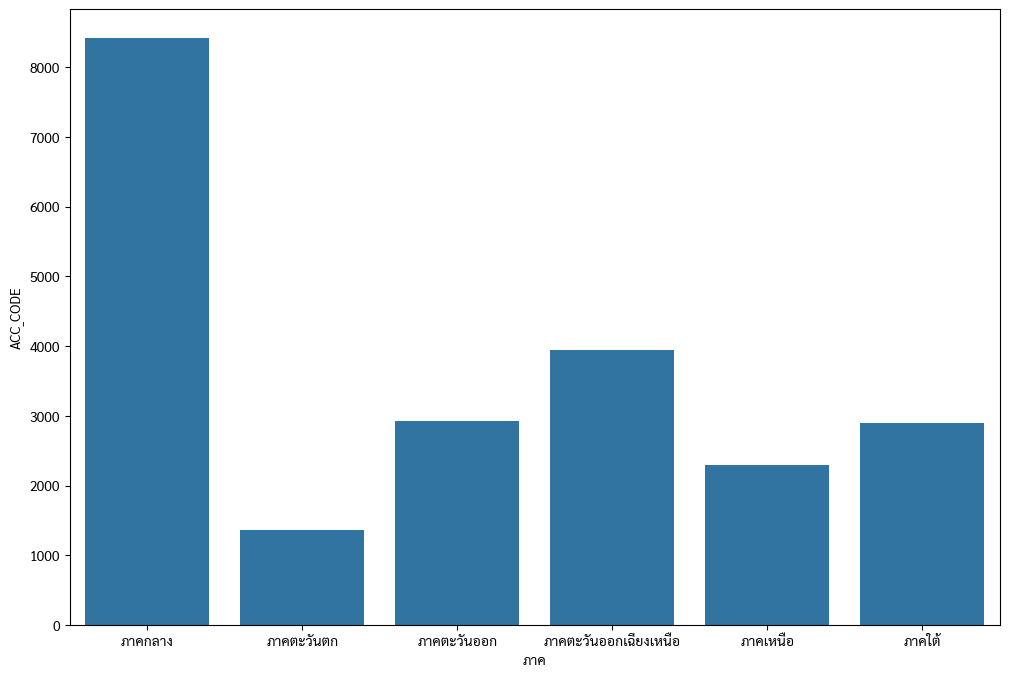

In [4]:
t1_region_accident=df.pivot_table(index='ภาค',values='ACC_CODE',aggfunc='count')
plt.figure(figsize=(12,8))
sns.barplot(x=t1_region_accident.index, y='ACC_CODE',data=t1_region_accident) # Changed 'df' to 'data' and set x to t1_region_accident.index


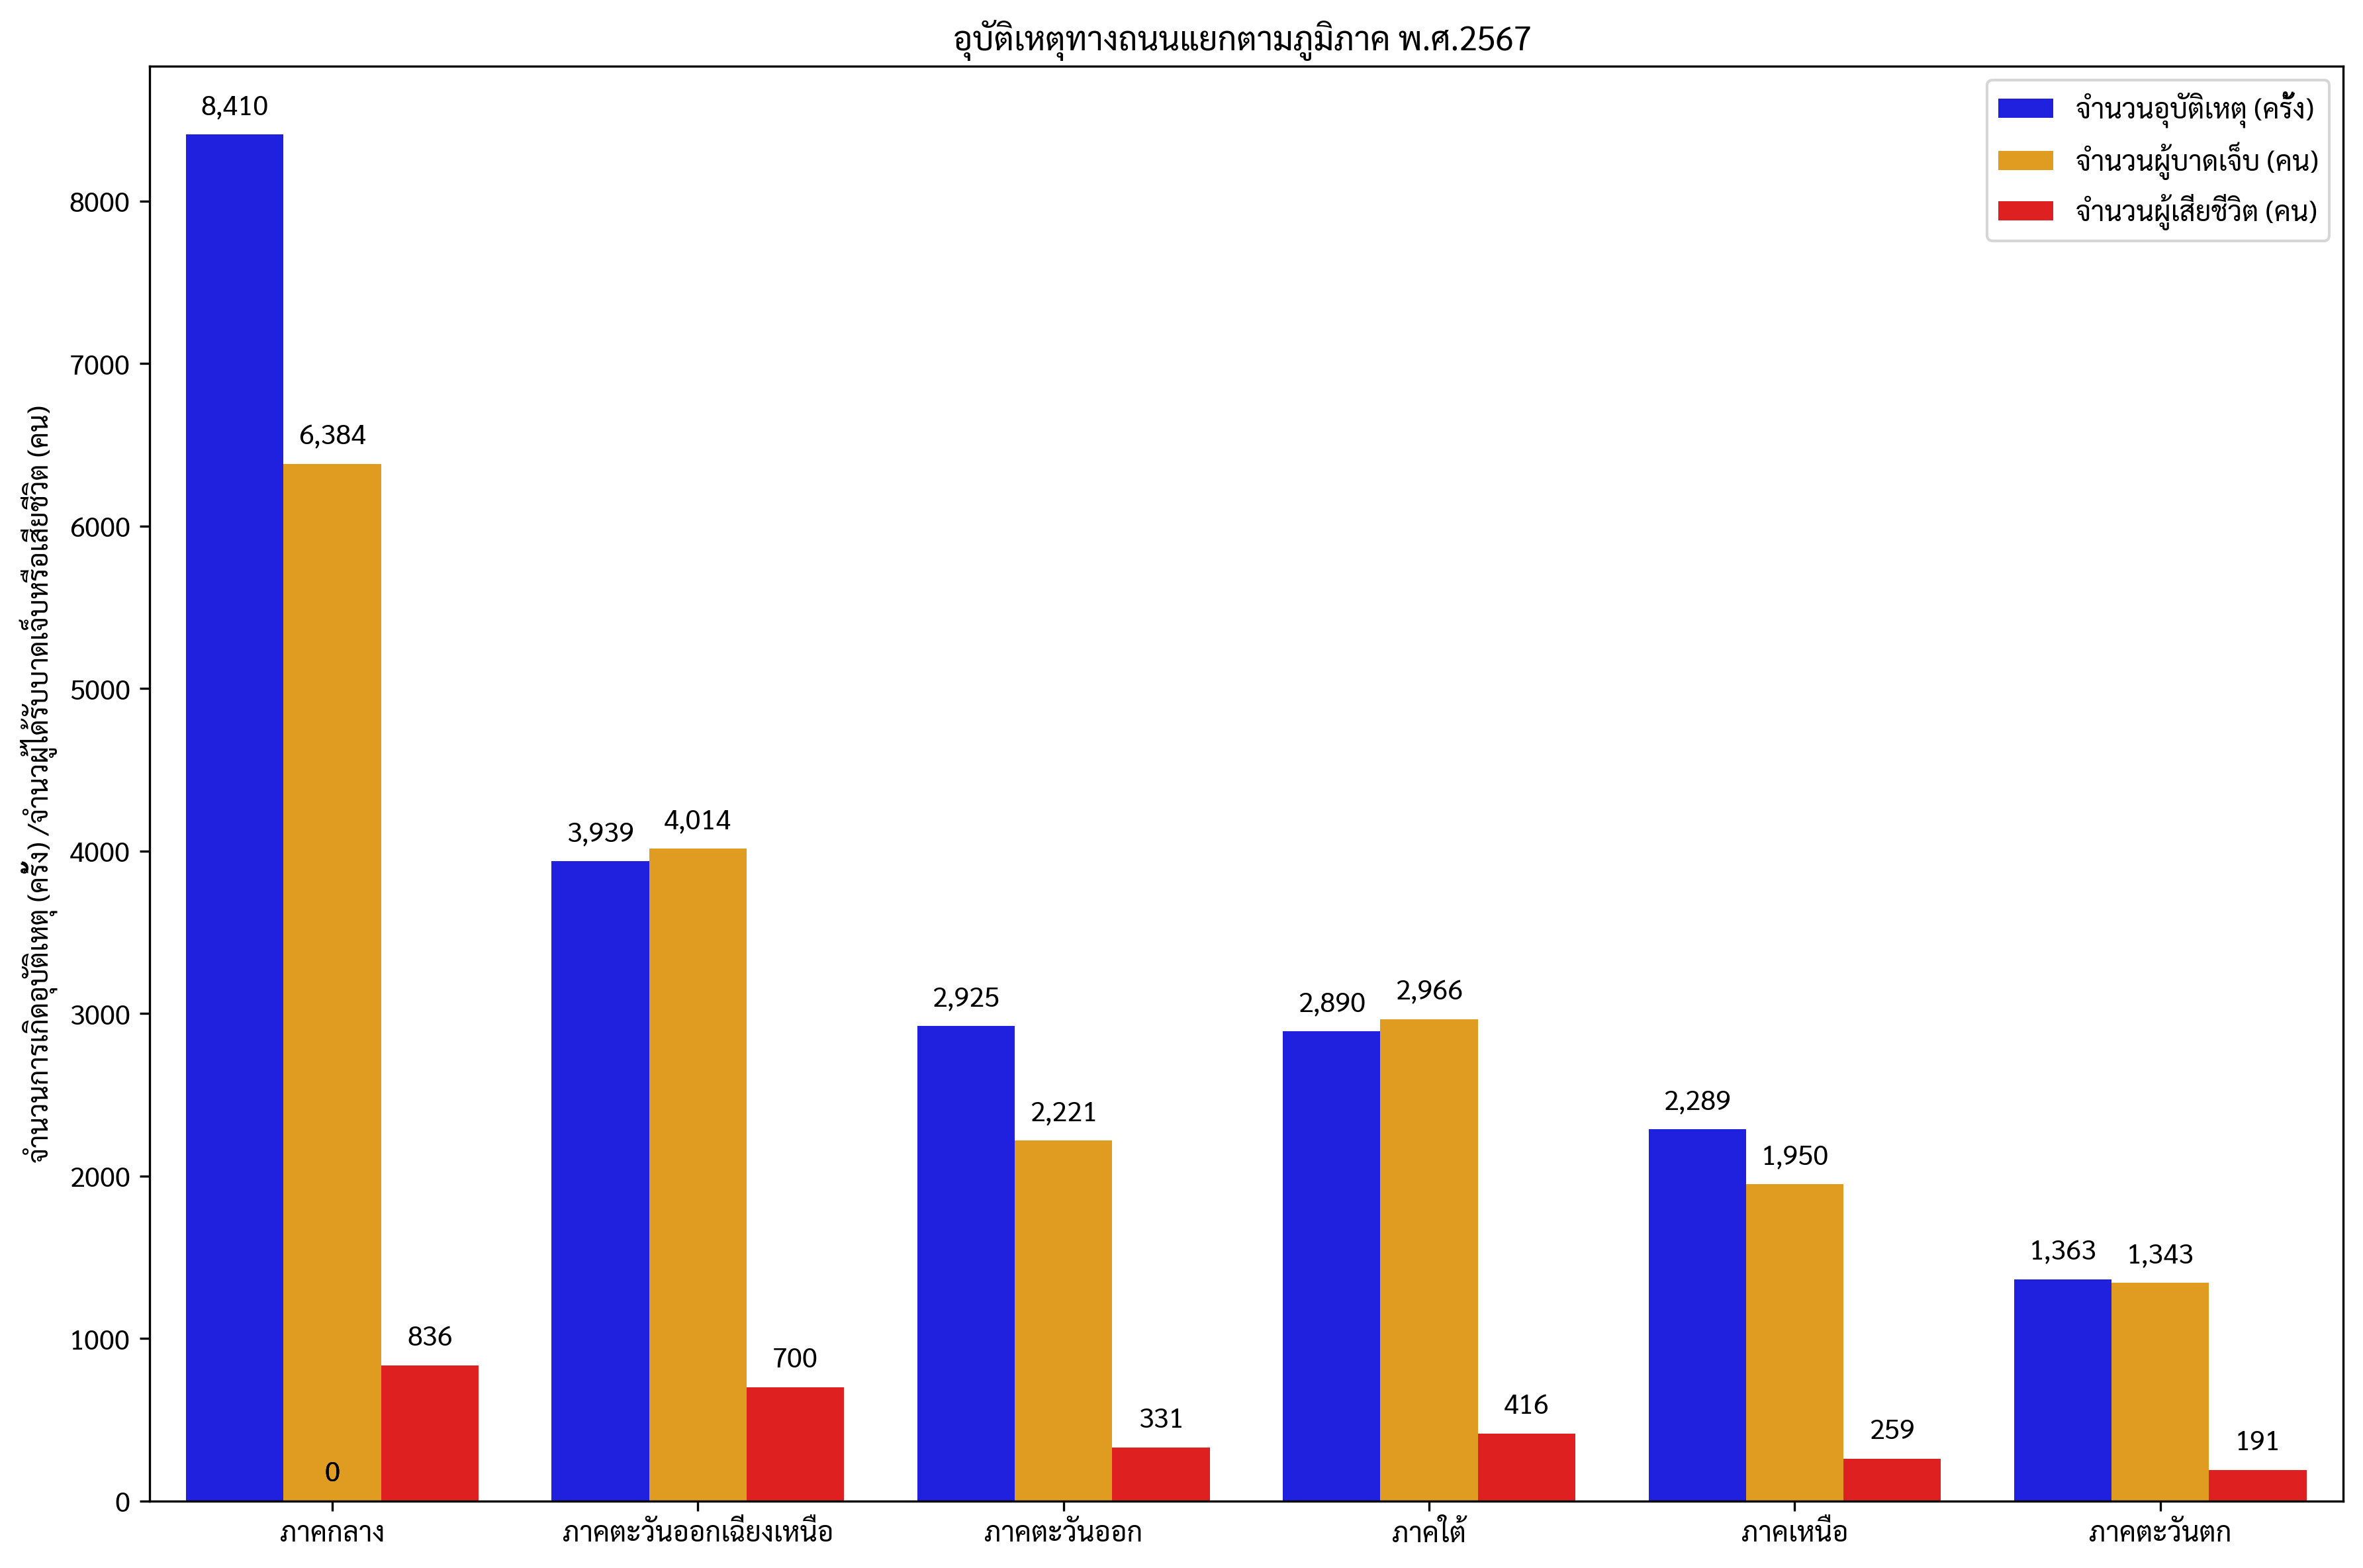

In [5]:
#ใช้ กราฟรวมจำนวนการเกิดอุบัติเหตุ ผู้บาดเจ็บและเสียชีวิตแยกตามภาค
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

# Create the pivot table with the desired columns
region_data = df.groupby('ภาค').agg(
    ACC_CODE_Count=('ACC_CODE', 'count'),
    Total_Injured=('รวมจำนวนผู้บาดเจ็บ', 'sum'),
    Total_Deaths=('จำนวนผู้เสียชีวิต', 'sum')
).sort_values(by='ACC_CODE_Count', ascending=False)

# Reset index to make 'ภาค' a column
region_data = region_data.reset_index()

# Melt the DataFrame for easier plotting with Seaborn
melted_data = pd.melt(region_data, id_vars=['ภาค'],
                      value_vars=['ACC_CODE_Count', 'Total_Injured', 'Total_Deaths'],
                      var_name='Category', value_name='Value')

melted_data['Category'] = melted_data['Category'].replace({
    'ACC_CODE_Count': 'จำนวนอุบัติเหตุ (ครั้ง)',
    'Total_Injured': 'จำนวนผู้บาดเจ็บ (คน)',
    'Total_Deaths': 'จำนวนผู้เสียชีวิต (คน)'
})

# Create the bar plot using Seaborn
plt.figure(figsize=(12,8),dpi=300)
graph2 = sns.barplot(x='ภาค', y='Value', hue='Category', data=melted_data,
                     palette={'จำนวนอุบัติเหตุ (ครั้ง)': 'blue',
                              'จำนวนผู้บาดเจ็บ (คน)': 'orange',
                              'จำนวนผู้เสียชีวิต (คน)': 'red'})


for p in graph2.patches:
    graph2.annotate(f'{p.get_height():,.0f}',  # แสดงค่า y
                (p.get_x() + p.get_width() / 2., p.get_height()),  # ตำแหน่งที่จะวางข้อความ
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')


plt.title('อุบัติเหตุทางถนนแยกตามภูมิภาค พ.ศ.2567 ')
#plt.xlabel('Region')
plt.xlabel(None)
plt.ylabel('จำนวนการเกิดอุบัติเหตุ (ครั้ง) /จำนวผู้ได้รับบาดเจ็บหรือเสียชีวิต (คน)')
plt.xticks(rotation=0, ha='center')  # Rotate x-axis labels for better readability
graph2.legend(title=None)
plt.tight_layout()
plt.show()

<ipython-input-116-5d7d6dd58c09>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
<ipython-input-116-5d7d6dd58c09>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
<ipython-input-116-5d7d6dd58c09>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
<ipython-input-116-5d7d6dd58c09>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].

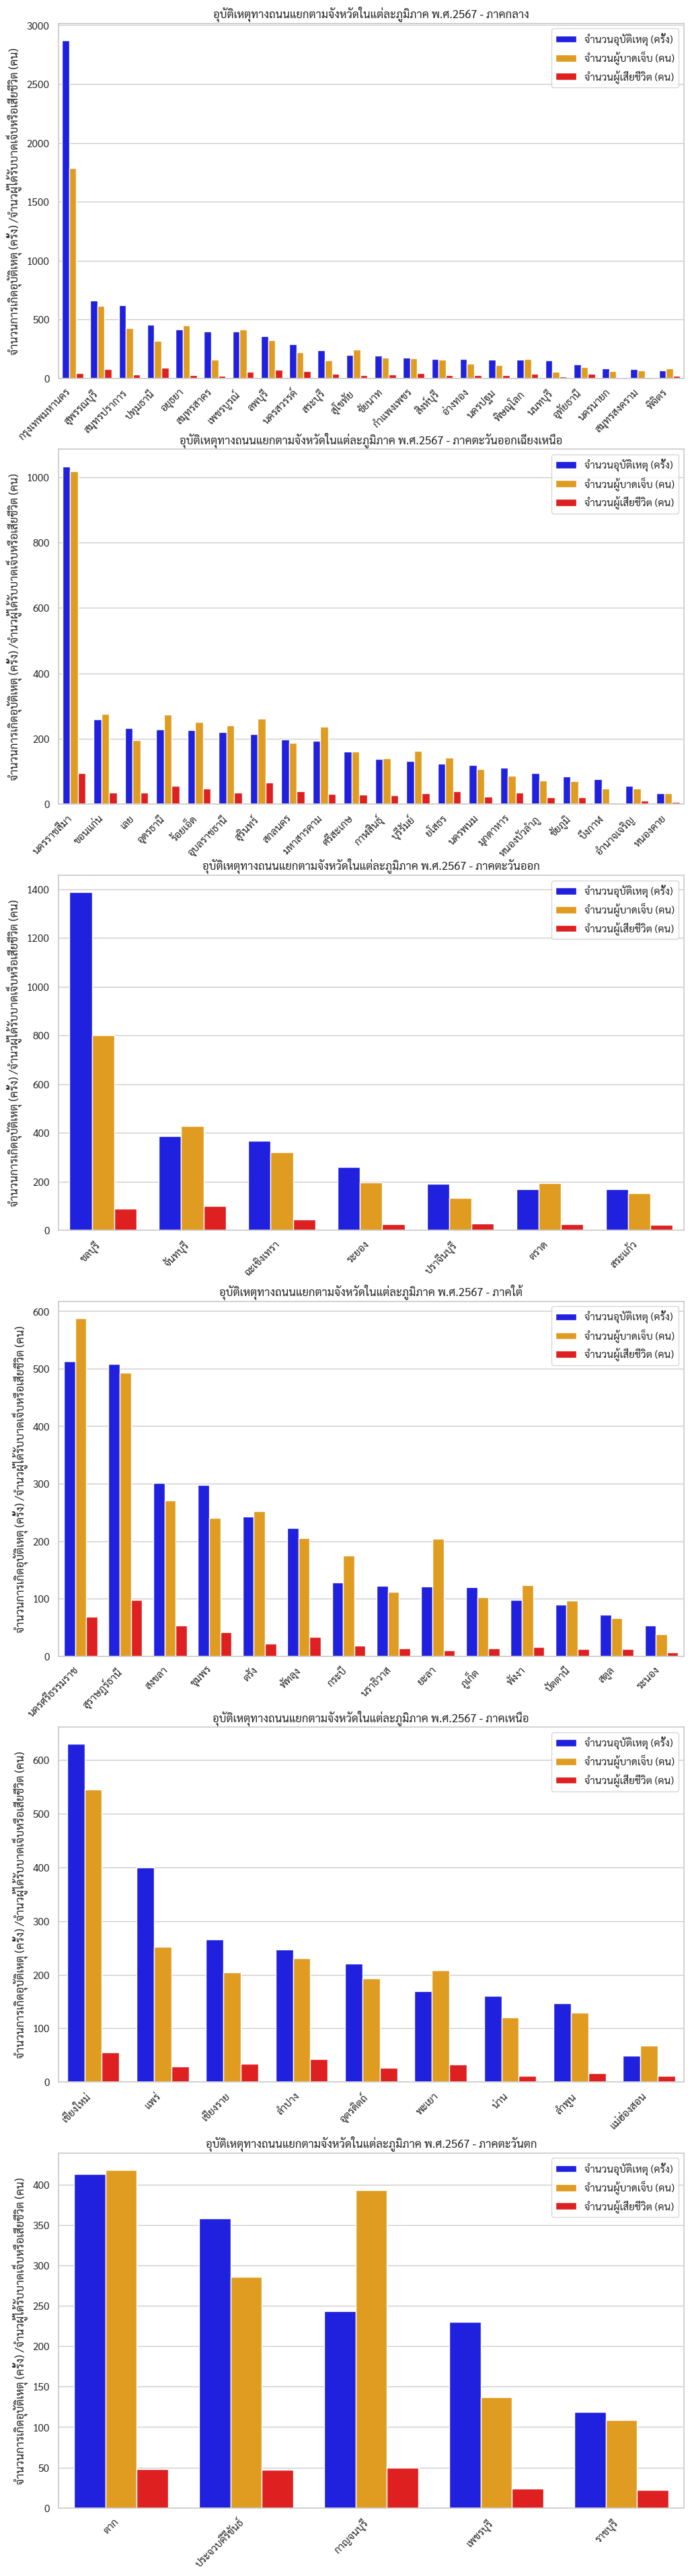

In [ ]:
#ใช้ กราฟรวมจำนวนการเกิดอุบัติเหตุ ผู้บาดเจ็บและเสียชีวิตแยกตามจังหวัดในแต่ละภาค
#import matplotlib.pyplot as plt
#import seaborn as sns
#import pandas as pd

# 1. Get unique regions

regions = df.groupby('ภาค').agg(
    ACC_CODE_Count=('ACC_CODE', 'count'),
    Total_Injured=('รวมจำนวนผู้บาดเจ็บ', 'sum'),
    Total_Deaths=('จำนวนผู้เสียชีวิต', 'sum')
).sort_values(by='ACC_CODE_Count', ascending=False).index.tolist()

# 2. Create subplots
fig, axes = plt.subplots(len(regions), 1, figsize=(12, 8 * len(regions)), sharex=False)

# 3. Iterate through regions and plot
for i, region in enumerate(regions):
    region_data = df[df['ภาค'] == region]

    # Create pivot table with Total Injured and Total Deaths
    t2_region_accident = region_data.groupby('จังหวัด').agg(
        ACC_CODE_Count=('ACC_CODE', 'count'),
        Total_Injured=('รวมจำนวนผู้บาดเจ็บ', 'sum'),
        Total_Deaths=('จำนวนผู้เสียชีวิต', 'sum')
    )

    # Sort by ACC_CODE_Count in descending order
    t2_region_accident = t2_region_accident.sort_values(by='ACC_CODE_Count', ascending=False)

    # Reset index to make 'จังหวัด' a column
    t2_region_accident = t2_region_accident.reset_index()

    # Melt the DataFrame for easier plotting with Seaborn
    melted_data = pd.melt(t2_region_accident, id_vars=['จังหวัด'],
                          value_vars=['ACC_CODE_Count', 'Total_Injured', 'Total_Deaths'],
                          var_name='Category', value_name='Value')

    melted_data['Category'] = melted_data['Category'].replace({
    'ACC_CODE_Count': 'จำนวนอุบัติเหตุ (ครั้ง)',
    'Total_Injured': 'จำนวนผู้บาดเจ็บ (คน)',
    'Total_Deaths': 'จำนวนผู้เสียชีวิต (คน)'
    })



    # Create the bar plot using Seaborn
    a=sns.barplot(x='จังหวัด', y='Value', hue='Category', data=melted_data, ax=axes[i],palette={'จำนวนอุบัติเหตุ (ครั้ง)': 'blue',
                                'จำนวนผู้บาดเจ็บ (คน)': 'orange',
                                'จำนวนผู้เสียชีวิต (คน)': 'red'},width=0.75).legend(title=None)

    axes[i].set_title(f'อุบัติเหตุทางถนนแยกตามจังหวัดในแต่ละภูมิภาค พ.ศ.2567 - {region}')  # Set title for each subplot
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels
    axes[i].set_xlabel('')
    axes[i].set_ylabel('จำนวนการเกิดอุบัติเหตุ (ครั้ง) /จำนวผู้ได้รับบาดเจ็บหรือเสียชีวิต (คน)')

#plt.tight_layout()
plt.show()


## **PLOT2 จำนวนการเกิดอุบัติเหตุแยกตามช่วงเวลาใน 1 วัน**

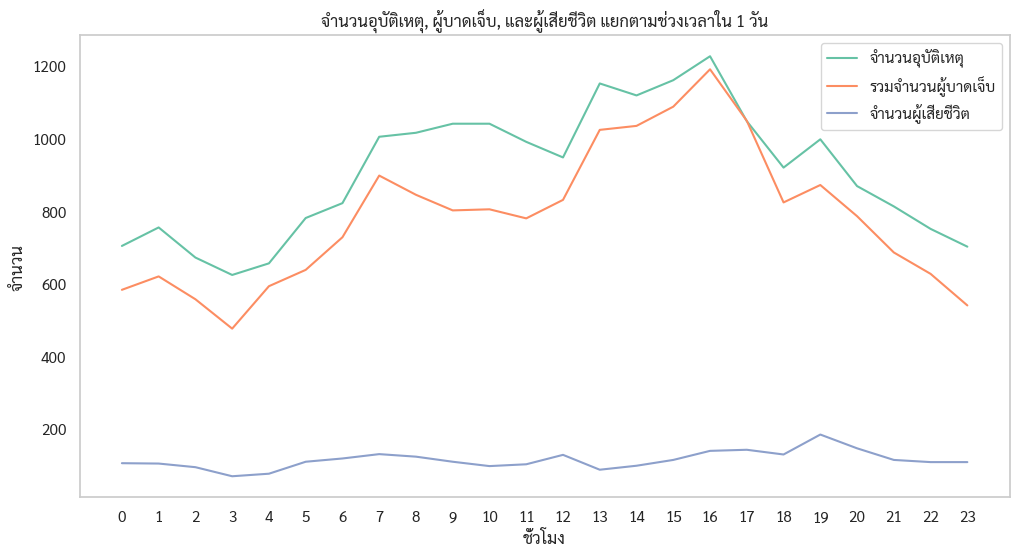

In [ ]:
# prompt: plot กราฟที่มี index ตามช่วงเวลาราย ชม ในคอลัมน์'เวลา' โดยมีค่า count'ACC_CODE' sum "รวมจำนวนผู้บาดเจ็บ' sum'จำนวนผู้เสียชีวิต'

# Assuming 'df' is your DataFrame and 'เวลา' column contains time information.
# Convert 'เวลา' to datetime objects if it's not already.
df['เวลา'] = pd.to_datetime(df['เวลา'])

# Extract hour from the 'เวลา' column
df['Hour'] = df['เวลา'].dt.hour

# Group by hour and calculate counts for ACC_CODE, sum of 'รวมจำนวนผู้บาดเจ็บ', and sum of 'จำนวนผู้เสียชีวิต'
hourly_data = df.groupby('Hour').agg({
    'ACC_CODE': 'count',
    'รวมจำนวนผู้บาดเจ็บ': 'sum',
    'จำนวนผู้เสียชีวิต': 'sum'
})

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_data.index, hourly_data['ACC_CODE'], label='จำนวนอุบัติเหตุ')
plt.plot(hourly_data.index, hourly_data['รวมจำนวนผู้บาดเจ็บ'], label='รวมจำนวนผู้บาดเจ็บ')
plt.plot(hourly_data.index, hourly_data['จำนวนผู้เสียชีวิต'], label='จำนวนผู้เสียชีวิต')
plt.xlabel('ชั่วโมง')
plt.ylabel('จำนวน')
plt.title('จำนวนอุบัติเหตุ, ผู้บาดเจ็บ, และผู้เสียชีวิต แยกตามช่วงเวลาใน 1 วัน')
plt.legend()
plt.xticks(range(24))  # Show ticks for each hour
plt.grid(False)
plt.show()


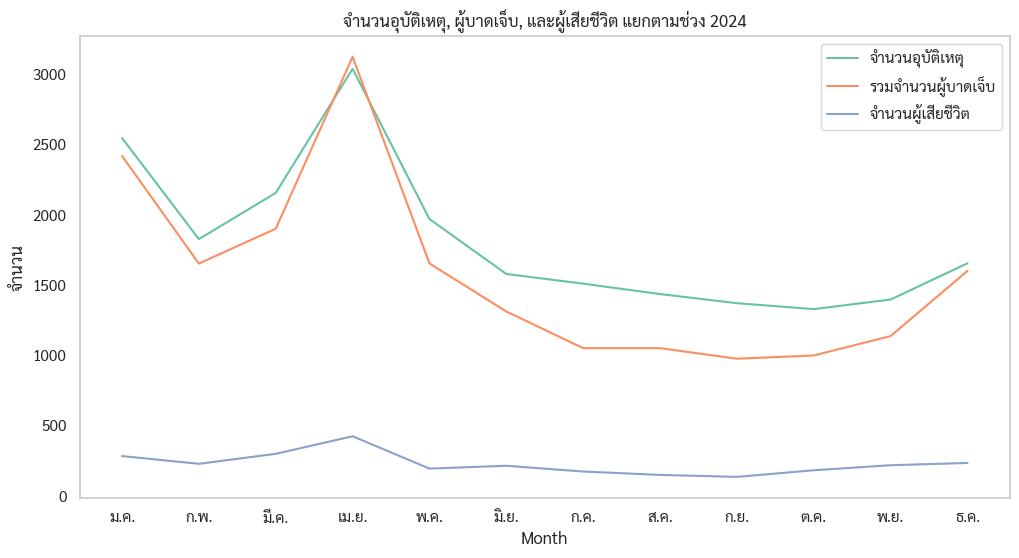

In [ ]:
# prompt: เปลี่ยน label 0 - 23 axis X to thai month label

# ## **PLOT2 จำนวนการเกิดอุบัติเหตุแยกตามช่วงเวลาใน 1 วัน**

# Assuming 'df' is your DataFrame and 'เวลา' column contains time information.
# Convert 'เวลา' to datetime objects if it's not already.
# df['เวลา'] = pd.to_datetime(df['เวลา'])
df['วันที่เกิดเหตุ'] = pd.to_datetime(df['วันที่เกิดเหตุ'], format='%d/%m/%Y', errors='coerce')

df['Month'] = df['วันที่เกิดเหตุ'].dt.month

# Group by hour and calculate counts for ACC_CODE, sum of 'รวมจำนวนผู้บาดเจ็บ', and sum of 'จำนวนผู้เสียชีวิต'
hourly_data = df.groupby('Month').agg({
    'ACC_CODE': 'count',
    'รวมจำนวนผู้บาดเจ็บ': 'sum',
    'จำนวนผู้เสียชีวิต': 'sum'
})

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(hourly_data.index, hourly_data['ACC_CODE'], label='จำนวนอุบัติเหตุ')
plt.plot(hourly_data.index, hourly_data['รวมจำนวนผู้บาดเจ็บ'], label='รวมจำนวนผู้บาดเจ็บ')
plt.plot(hourly_data.index, hourly_data['จำนวนผู้เสียชีวิต'], label='จำนวนผู้เสียชีวิต')
plt.xlabel('Month')
plt.ylabel('จำนวน')
plt.title('จำนวนอุบัติเหตุ, ผู้บาดเจ็บ, และผู้เสียชีวิต แยกตามช่วง 2024')
plt.legend()

thai_months = ['ม.ค.', 'ก.พ.', 'มี.ค.', 'เม.ย.', 'พ.ค.', 'มิ.ย.', 'ก.ค.', 'ส.ค.', 'ก.ย.', 'ต.ค.', 'พ.ย.', 'ธ.ค.']

plt.xticks(list(range(1,13)), thai_months)  # Replace with Thai month labels
plt.grid(False)
plt.show()


In [ ]:
df

ปีที่เกิดเหตุ วันที่เกิดเหตุ                เวลา วันที่รายงาน  \
0               2024     2024-01-01 2025-03-24 00:12:00   18/06/2024   
1               2024     2024-01-01 2025-03-24 00:30:00   01/01/2024   
2               2024     2024-01-01 2025-03-24 00:30:00   02/01/2024   
3               2024     2024-01-01 2025-03-24 00:30:00   01/01/2024   
4               2024     2024-01-01 2025-03-24 00:30:00   02/01/2024   
...              ...            ...                 ...          ...   
21811           2024     2024-12-31 2025-03-24 22:00:00   01/01/2025   
21812           2024     2024-12-31 2025-03-24 22:20:00   01/01/2025   
21813           2024     2024-12-31 2025-03-24 22:40:00   01/01/2025   
21814           2024     2024-12-31 2025-03-24 22:40:00   17/01/2025   
21815           2024     2024-12-31 2025-03-24 22:50:00   21/01/2025   

      เวลาที่รายงาน  ACC_CODE        หน่วยงาน สายทางหน่วยงาน รหัสสายทาง  \
0          14:23:00   9701543      กรมทางหลวง        ทางหลวง       4164   
1          12:13:00   8901889      กรมทางหลวง        ทางหลวง        106   
2           4:18:00   8902334      กรมทางหลวง        ทางหลวง       1143   
3          11:40:00   8902375      กรมทางหลวง        ทางหลวง       3390   
4           5:10:00   8902450      กรมทางหลวง        ทางหลวง       4021   
...             ...       ...             ...            ...        ...   
21811      18:37:00   9966216      กรมทางหลวง        ทางหลวง        215   
21812       3:48:00   9965756      กรมทางหลวง        ทางหลวง          1   
21813       4:06:00   9965766      กรมทางหลวง        ทางหลวง         33   
21814      10:34:00   9995783  กรมทางหลวงชนบท    ทางหลวงชนบท    สห.3026   
21815       8:08:00   9974118      กรมทางหลวง        ทางหลวง       3201   

                                                  สายทาง  ...  รหัสจังหวัด  \
0                                                    NaN  ...          NaN   
1                                          ลี้ - ม่วงโตน  ...         51.0   
2                                     น้ำคลาด - ปางหมิ่น  ...         65.0   
3                                        หนองรี - บ่อยาง  ...          NaN   
4                               เมืองภูเก็ต - ห้าแยกฉลอง  ...          NaN   
...                                                  ...  ...          ...   
21811                                                NaN  ...         45.0   
21812                        ดงจำปา - แยกร.พ.อานันทมหิดล  ...         16.0   
21813                                  สุพรรณบุรี - นาคู  ...         16.0   
21814  แยกทางหลวงหมายเลข 311 (กม.ที่ 27+960) - แยกทาง...  ...         10.0   
21815                              เนินสันติ - แยกยายรวย  ...         10.0   

      จังหวัดที่จดทะเบียน หน่วยงานที่ซ้ำซ้อน      OBJ_CODE OBJ_TYPE_CODE  \
0                     NaN                NaN  1.930700e+12           3.0   
1                   ลำพูน                NaN           NaN           3.0   
2                พิษณุโลก                NaN           NaN           3.0   
3                     NaN                NaN           NaN           3.0   
4                     NaN                NaN           NaN           3.0   
...                   ...                ...           ...           ...   
21811            ร้อยเอ็ด                NaN           NaN          11.0   
21812              ลพบุรี                NaN           NaN           3.0   
21813              ลพบุรี                NaN           NaN          11.0   
21814       กรุงเทพมหานคร                NaN           NaN           7.0   
21815       กรุงเทพมหานคร                NaN           NaN          11.0   

      รหัสลักษณะการเกิดอุบัติเหตุของหน่วยงาน Hour รวมบาดเจ็บ count Month  
0                                        701    0          1     1     1  
1                                        705    0          1     1     1  
2                                        701    0          1     1     1  
3                                          5    0          2     1     1  
4               

from matplotlib import pyplot as plt
df['ACC_CODE'].plot(kind='hist', bins=20, title='ACC_CODE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['ก.ม.'].plot(kind='hist', bins=20, title='ก.ม.')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['LATITUDE'].plot(kind='hist', bins=20, title='LATITUDE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['LONGITUDE'].plot(kind='hist', bins=20, title='LONGITUDE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('หน่วยงาน').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('สายทางหน่วยงาน').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ภาค').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('สภาพอากาศ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='ACC_CODE', y='ก.ม.', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='ก.ม.', y='LATITUDE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='LATITUDE', y='LONGITUDE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='LONGITUDE', y='OBJ_BRAND_CODE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['วันที่เกิดเหตุ']
  ys = series['ACC_CODE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('วันที่เกิดเหตุ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('หน่วยงาน')):
  _plot_series(series, series_name, i)
  fig.legend(title='หน่วยงาน', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('วันที่เกิดเหตุ')
_ = plt.ylabel('ACC_CODE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['วันที่เกิดเหตุ']
  ys = series['ACC_CODE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('วันที่เกิดเหตุ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('สายทางหน่วยงาน')):
  _plot_series(series, series_name, i)
  fig.legend(title='สายทางหน่วยงาน', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('วันที่เกิดเหตุ')
_ = plt.ylabel('ACC_CODE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['วันที่เกิดเหตุ']
  ys = series['ACC_CODE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('วันที่เกิดเหตุ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ภาค')):
  _plot_series(series, series_name, i)
  fig.legend(title='ภาค', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('วันที่เกิดเหตุ')
_ = plt.ylabel('ACC_CODE')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['วันที่เกิดเหตุ']
  ys = series['ACC_CODE']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('วันที่เกิดเหตุ', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('สภาพอากาศ')):
  _plot_series(series, series_name, i)
  fig.legend(title='สภาพอากาศ', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('วันที่เกิดเหตุ')
_ = plt.ylabel('ACC_CODE')

from matplotlib import pyplot as plt
df['ACC_CODE'].plot(kind='line', figsize=(8, 4), title='ACC_CODE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['ก.ม.'].plot(kind='line', figsize=(8, 4), title='ก.ม.')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['LATITUDE'].plot(kind='line', figsize=(8, 4), title='LATITUDE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['LONGITUDE'].plot(kind='line', figsize=(8, 4), title='LONGITUDE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['สายทางหน่วยงาน'].value_counts()
    for x_label, grp in df.groupby('หน่วยงาน')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('หน่วยงาน')
_ = plt.ylabel('สายทางหน่วยงาน')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ภาค'].value_counts()
    for x_label, grp in df.groupby('สายทางหน่วยงาน')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('สายทางหน่วยงาน')
_ = plt.ylabel('ภาค')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['สภาพอากาศ'].value_counts()
    for x_label, grp in df.groupby('ภาค')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ภาค')
_ = plt.ylabel('สภาพอากาศ')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['DRIVER_SAFETY'].value_counts()
    for x_label, grp in df.groupby('สภาพอากาศ')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('สภาพอากาศ')
_ = plt.ylabel('DRIVER_SAFETY')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['หน่วยงาน'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ACC_CODE', y='หน่วยงาน', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['สายทางหน่วยงาน'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ACC_CODE', y='สายทางหน่วยงาน', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['ภาค'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ACC_CODE', y='ภาค', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['สภาพอากาศ'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ACC_CODE', y='สภาพอากาศ', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

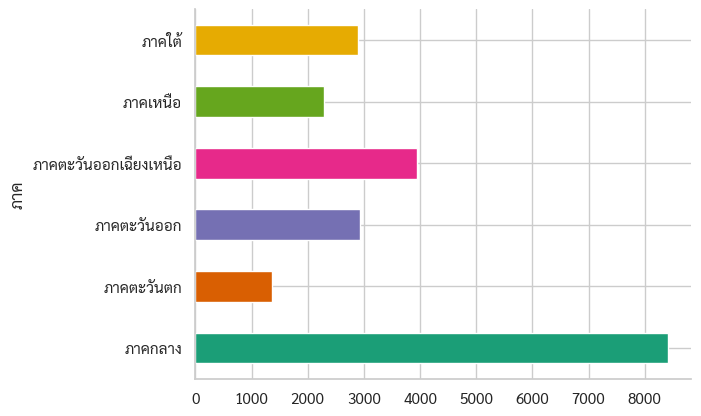

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('ภาค').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

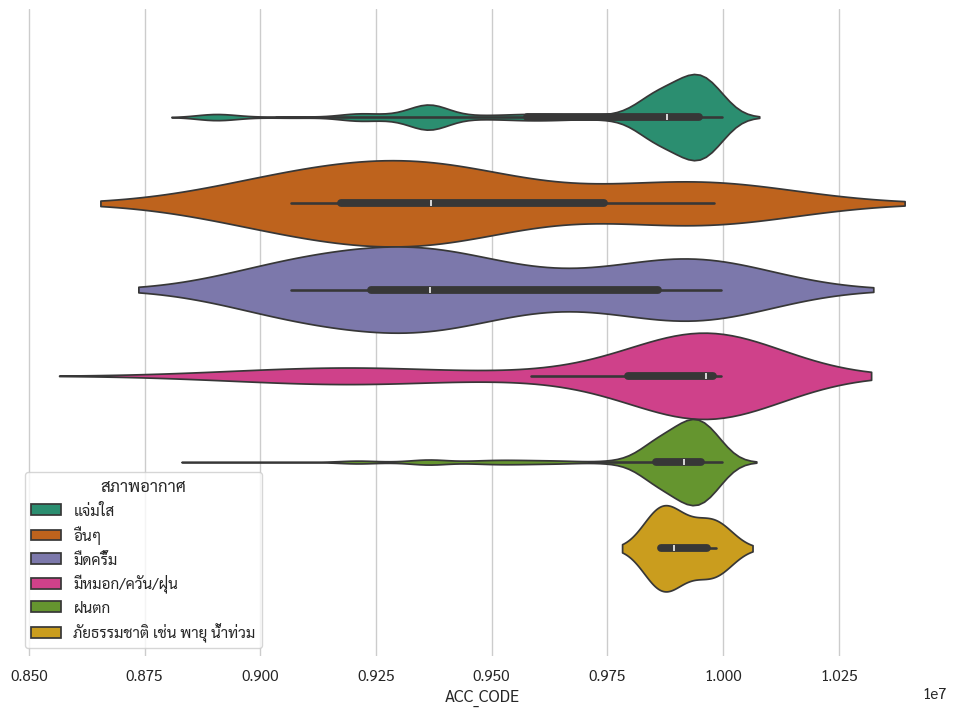

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['สภาพอากาศ'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='ACC_CODE', inner='box', palette='Dark2',hue='สภาพอากาศ')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-109-2ebbfef102e6>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['เวลา'] = pd.to_datetime(df['เวลา'], errors='coerce')  # Handle potential errors in datetime conversion


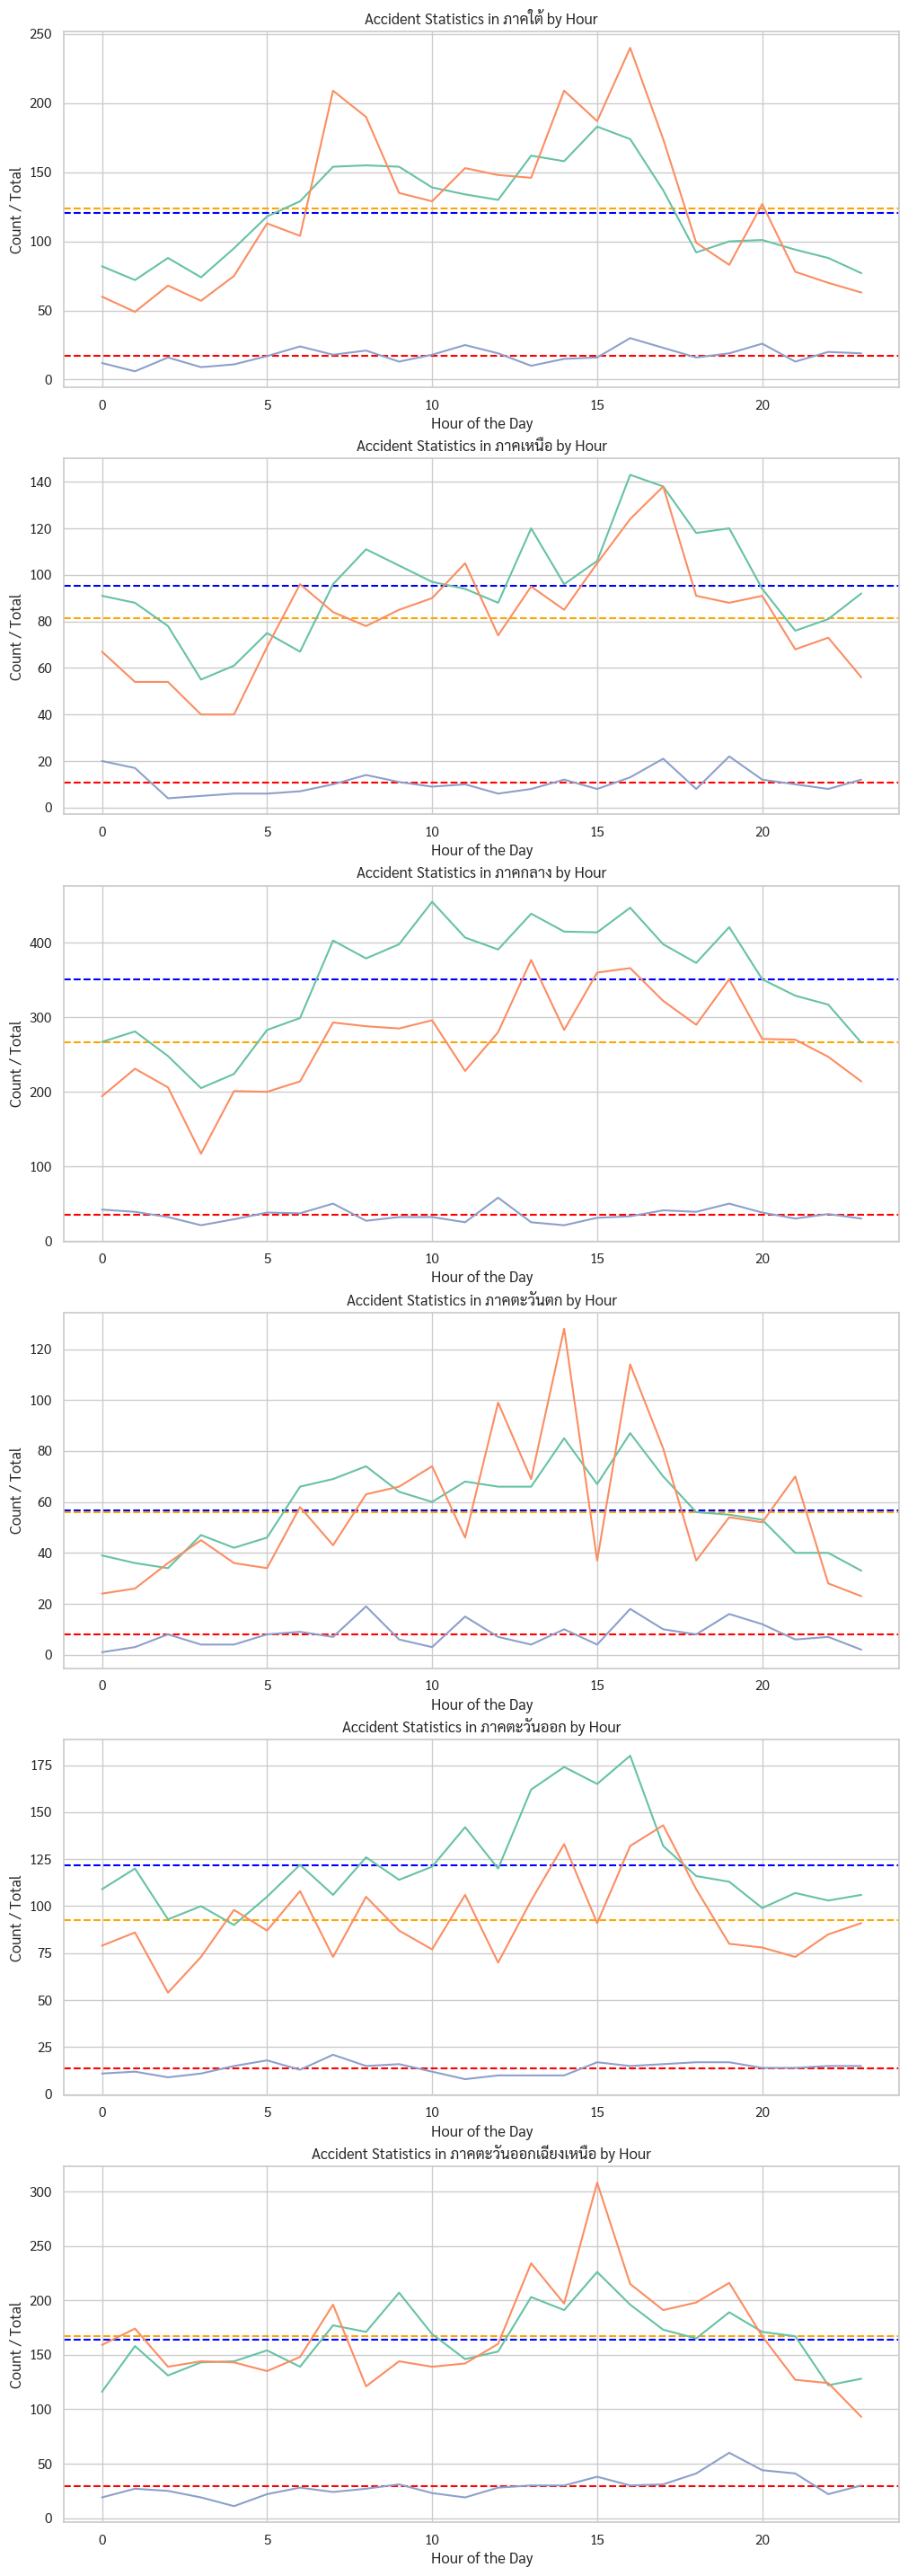

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assume 'df' is your DataFrame

# 1. Convert 'เวลา' to datetime objects and extract hour
df['เวลา'] = pd.to_datetime(df['เวลา'], errors='coerce')  # Handle potential errors in datetime conversion
df['Hour'] = df['เวลา'].dt.hour

# 2. Get unique regions
regions = df['ภาค'].unique()

# 3. Create subplots
fig, axes = plt.subplots(len(regions), 1, figsize=(12, 6 * len(regions)), sharex=False)

# 4. Iterate through regions and plot
for i, region in enumerate(regions):
    region_data = df[df['ภาค'] == region]

    # Group by hour and calculate metrics
    hourly_data = region_data.groupby('Hour').agg(
        ACC_CODE_Count=('ACC_CODE', 'count'),
        Total_Injured=('รวมจำนวนผู้บาดเจ็บ', 'sum'),
        Total_Deaths=('จำนวนผู้เสียชีวิต', 'sum')
    )

     # Calculate average values
    avg_acc_count = hourly_data['ACC_CODE_Count'].mean()
    avg_total_injured = hourly_data['Total_Injured'].mean()
    avg_total_deaths = hourly_data['Total_Deaths'].mean()

    # Add horizontal lines for averages
    axes[i].axhline(avg_acc_count, color='blue', linestyle='--', label='Avg Accident Count')
    axes[i].axhline(avg_total_injured, color='orange', linestyle='--', label='Avg Total Injured')
    axes[i].axhline(avg_total_deaths, color='red', linestyle='--', label='Avg Total Deaths')

    # Plotting on the subplot
    axes[i].plot(hourly_data.index, hourly_data['ACC_CODE_Count'], label='Accident Count')
    axes[i].plot(hourly_data.index, hourly_data['Total_Injured'], label='Total Injured')
    axes[i].plot(hourly_data.index, hourly_data['Total_Deaths'], label='Total Deaths')

    # Customize subplot
    axes[i].set_title(f'Accident Statistics in {region} by Hour')
    axes[i].set_xlabel('Hour of the Day')
    axes[i].set_ylabel('Count / Total')

### EDA-2

In [10]:
hourly_data = df.groupby('มูลเหตุสันนิษฐาน').agg({
    'ACC_CODE': 'count',
    'รวมจำนวนผู้บาดเจ็บ': 'sum',
    'จำนวนผู้เสียชีวิต': 'sum'
})
hourly_data

ACC_CODE  \
มูลเหตุสันนิษฐาน                                               
การกระทำที่สุ่มเสี่ยงบนถนน                                 6   
ขับขี่ช้าเกินเนื่องจากลักษณะของยานพาหนะ (เช่น แ...         4   
ขับรถคร่อมเส้นแบ่งทิศทาง                                   4   
ขับรถตามกระชั้นชิด                                        37   
ขับรถผิดช่องทาง                                            6   
ขับรถย้อนศร                                              138   
ขับรถเร็วเกินอัตรากำหนด                                15010   
ขับรถไม่เปิดไฟ/ไม่ใช้แสงสว่างตามกำหนด                      5   
ข้ามถนนโดยมีรถจอดหรือวัตถุข้างทางบดบังผู้ขับขี่            1   
คน/รถ/สัตว์ตัดหน้ากระชั้นชิด                            1492   
ความประมาท/เร่งรีบ (วิ่งตัดหน้า)                          63   
ถนนชำรุด                                                  16   
ถนนลื่น                                                  511   
ถนนแคบ                                                     1   
ทางโค้งอันตราย                                            46   
ทำงานบนถนน                                                 4   
บรรทุกเกินอัตรา                                           49   
ป้ายจราจรถูกบดบัง                                          2   
ฝ่าฝืนป้ายหยุดขณะออกจากทางร่วมทางแยก                      10   
ฝ่าฝืนสัญญาณไฟ/เครื่องหมายจราจร                          184   
มีกองวัสดุ/สิ่งกีดขวาง                                   111   
มีสิ่งรบกวนภายนอกรถ                                        1   
มีสิ่งรบกวนภายในรถ                                         8   
มึนเมาจากแอลกอฮอล์                                         1   
ยางเสื่อมสภาพ/ยางแตก                                     606   
รถเสียไม่แสดงเครื่องหมาย/สัญญาณตามที่กำหนด                 1   
รถเสียไม่แสดงเครื่องหมายหรือสัญญาณไฟที่กำหนด              13   
ระบบบังคับเลี้ยวขัดข้อง                                    4   
ระบบสัญญาณไฟจราจรขัดข้อง                                   4   
ระบบห้ามล้อขัดข้อง/ระบบเบรกชำรุด                         107   
ระบบไฟฟ้าของยานพาหนะขัดข้อง                                6   
ระยะการมองเห็นไม่เพียงพอ                                  23   
ระยะปลอดภัยข้างทางไม่เพียงพอ                               1   
สูญเสียการควบคุม                                         167   
หยุดรถกะทันหัน                                            14   
หลับใน                                                  1651   
อาการป่วย หรือการไร้ความสามารถทางประสาทหรือร่างกาย         6   
อุปกรณ์ยานพาหนะบกพร่อง                                   116   
เปลี่ยนช่องทางกะทันหัน                                    36   
เมาสุรา                                                  297   
แซงรถอย่างผิดกฎหมาย                                       61   
แสงสว่างไม่เพียงพอ                                        45   
โรคประจำตัว                                               48   
ใช้โทรศัพท์เคลื่อนที่ขณะขับรถ                             34   
ไม่คุ้นเคยเส้นทาง/ขับรถไม่ชำนาญ                          143   
ไม่ยอมให้รถที่มีสิทธิ์ไปก่อน                              38   
ไม่ให้สัญญาณชะลอ/เลี้ยว                                   77   
ไม่ให้สัญญาณเข้าจอด/ออกจากที่จอด                          14   

                                                    รวมจำนวนผู้บาดเจ็บ  \
มูลเหตุสันนิษฐาน                                                         
การกระทำที่สุ่มเสี่ยงบนถนน                                           4   
ขับขี่ช้าเกินเนื่องจากลักษณะของยานพาหนะ (เช่น แ...                   2   
ขับรถคร่อมเส้นแบ่งทิศทาง                                             2   
ขับรถตามกระชั้นชิด                                                  31   
ขับรถผิดช่องทาง                                                      4   
ขับรถย้อนศร                                                        162   
ขับรถเร็วเกินอัตรากำหนด                                          12315   
ขับรถไม่เปิดไฟ/ไม่ใช้แสงสว่างตามกำหนด                                6   
ข้ามถนนโดยมีรถจอดหรือวัตถุข้างทางบดบังผู้ขับขี่                      0   
คน/รถ/สัตว์ตัดหน้ากระชั้นชิด         

In [11]:
# prompt: สร้างpivottable ที่มี index count 'ACC_CODE' ,sum ' รวมจำนวนผู้บาดเจ็บ', sum'จำนวนผู้เสียชีวิต' column pivot table คือ 'มูลเหตุสันนิษฐาน' เรียงลำดับจากมากไปน้อย

# สร้าง pivot table ที่มี index count 'ACC_CODE' ,sum ' รวมจำนวนผู้บาดเจ็บ', sum'จำนวนผู้เสียชีวิต' column pivot table คือ 'มูลเหตุสันนิษฐาน' เรียงลำดับจากมากไปน้อย
pivot_table = df.pivot_table(
    index='มูลเหตุสันนิษฐาน',
    values=['ACC_CODE', 'รวมจำนวนผู้บาดเจ็บ', 'จำนวนผู้เสียชีวิต'],
    aggfunc={'ACC_CODE': 'count', 'รวมจำนวนผู้บาดเจ็บ': 'sum', 'จำนวนผู้เสียชีวิต': 'sum'}
)

# เรียงลำดับ pivot table จากมากไปน้อยตาม 'ACC_CODE'
pivot_table = pivot_table.sort_values('ACC_CODE', ascending=False)

pivot_table.T


มูลเหตุสันนิษฐาน    ขับรถเร็วเกินอัตรากำหนด  หลับใน  \
ACC_CODE                              15010    1651   
จำนวนผู้เสียชีวิต                      1755     182   
รวมจำนวนผู้บาดเจ็บ                    12315    1705   

มูลเหตุสันนิษฐาน    คน/รถ/สัตว์ตัดหน้ากระชั้นชิด  ยางเสื่อมสภาพ/ยางแตก  \
ACC_CODE                                    1492                   606   
จำนวนผู้เสียชีวิต                            322                    17   
รวมจำนวนผู้บาดเจ็บ                          1744                   418   

มูลเหตุสันนิษฐาน    ถนนลื่น  เมาสุรา  ฝ่าฝืนสัญญาณไฟ/เครื่องหมายจราจร  \
ACC_CODE                511      297                              184   
จำนวนผู้เสียชีวิต        47       64                               41   
รวมจำนวนผู้บาดเจ็บ      368      292                              273   

มูลเหตุสันนิษฐาน    สูญเสียการควบคุม  ไม่คุ้นเคยเส้นทาง/ขับรถไม่ชำนาญ  \
ACC_CODE                         167                              143   
จำนวนผู้เสียชีวิต                 19                               17   
รวมจำนวนผู้บาดเจ็บ               197                              167   

มูลเหตุสันนิษฐาน    ขับรถย้อนศร  ...  ทำงานบนถนน  \
ACC_CODE                    138  ...           4   
จำนวนผู้เสียชีวิต            64  ...           7   
รวมจำนวนผู้บาดเจ็บ          162  ...          11   

มูลเหตุสันนิษฐาน    ขับขี่ช้าเกินเนื่องจากลักษณะของยานพาหนะ (เช่น แทรคเตอร์)  \
ACC_CODE                                                            4          
จำนวนผู้เสียชีวิต                                                   0          
รวมจำนวนผู้บาดเจ็บ                                                  2          

มูลเหตุสันนิษฐาน    ระบบบังคับเลี้ยวขัดข้อง  ป้ายจราจรถูกบดบัง  ถนนแคบ  \
ACC_CODE                                  4                  2       1   
จำนวนผู้เสียชีวิต                         0                  0       0   
รวมจำนวนผู้บาดเจ็บ                        2                  2       1   

มูลเหตุสันนิษฐาน    ข้ามถนนโดยมีรถจอดหรือวัตถุข้างทางบดบังผู้ขับขี่  \
ACC_CODE                                                          1   
จำนวนผู้เสียชีวิต                                                 1   
รวมจำนวนผู้บาดเจ็บ                                                0   

มูลเหตุสันนิษฐาน    รถเสียไม่แสดงเครื่องหมาย/สัญญาณตามที่กำหนด  \
ACC_CODE                                                     1   
จำนวนผู้เสียชีวิต                                            0   
รวมจำนวนผู้บาดเจ็บ                                           2   

มูลเหตุสันนิษฐาน    มึนเมาจากแอลกอฮอล์  มีสิ่งรบกวนภายนอกรถ  \
ACC_CODE                             1                    1   
จำนวนผู้เสียชีวิต                    1                    0   
รวมจำนวนผู้บาดเจ็บ                   0                    0   

มูลเหตุสันนิษฐาน    ระยะปลอดภัยข้างทางไม่เพียงพอ  
ACC_CODE                                       1  
จำนวนผู้เสียชีวิต                              0  
รวมจำนวนผู้บาดเจ็บ                             2  

[3 rows x 48 columns]

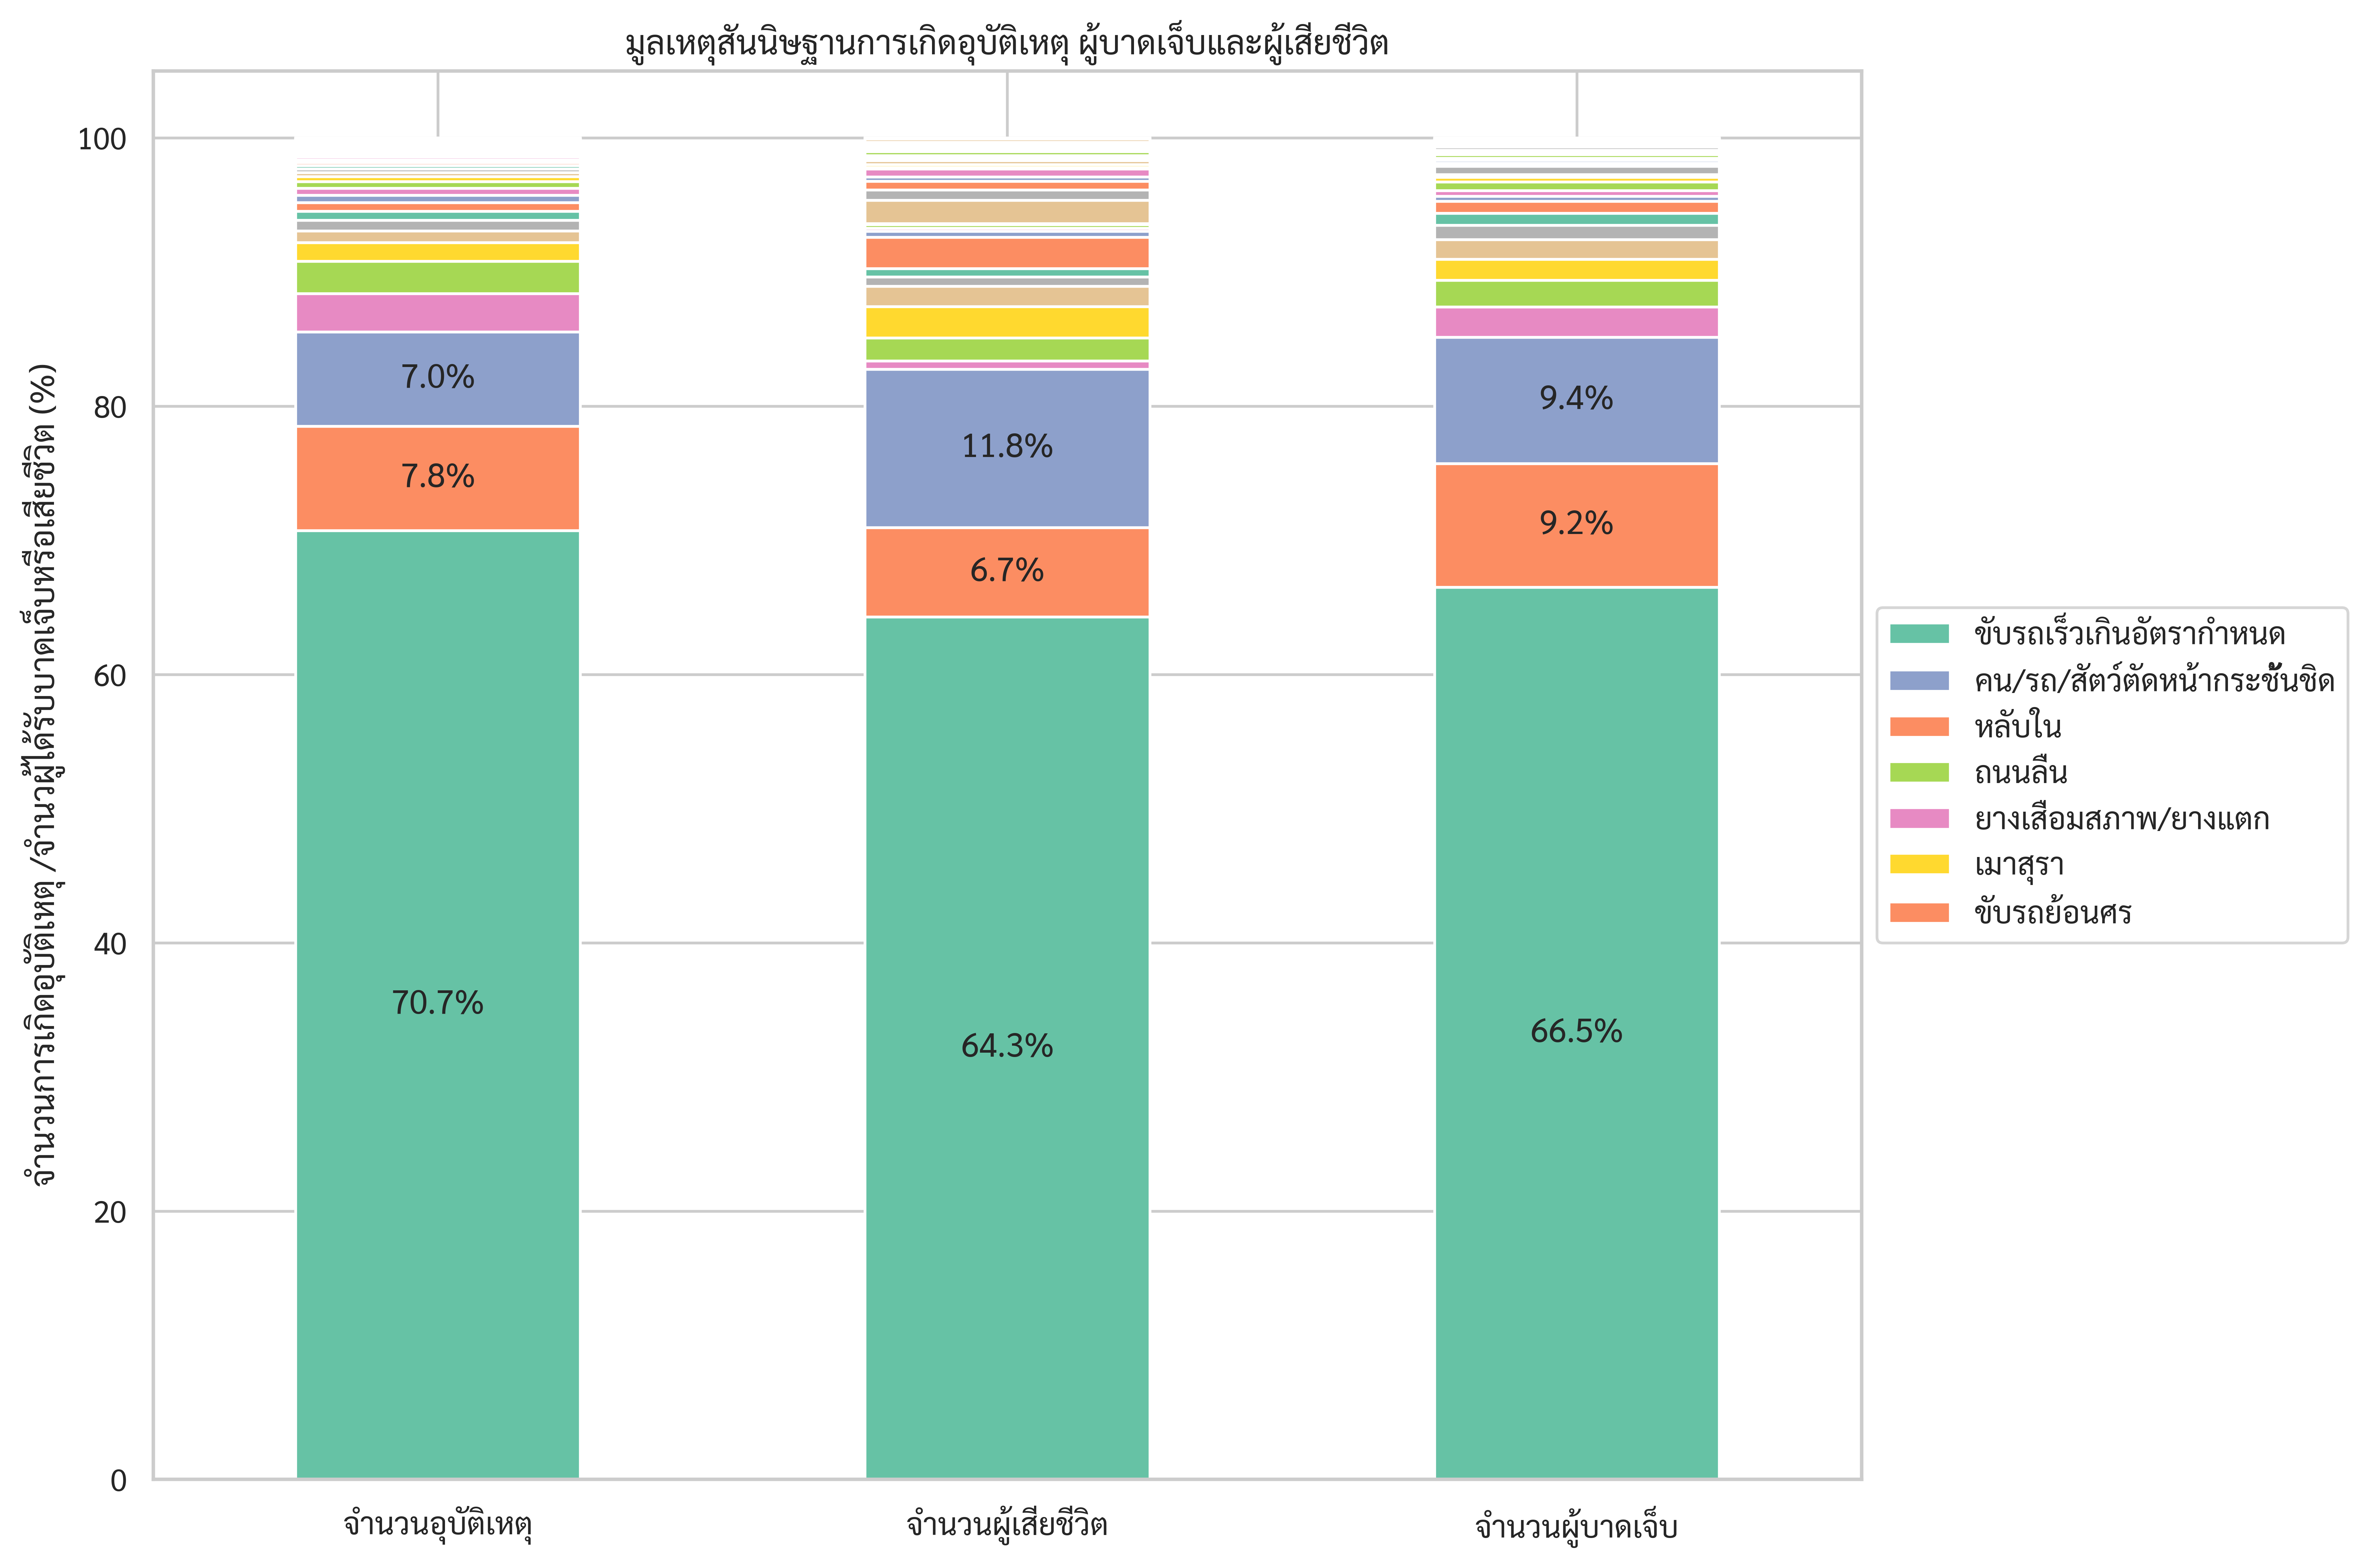

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Transpose the pivot table to have categories as columns
pivot_table_transposed = pivot_table.T

# Calculate percentage values for each category within each group
percentage_values = pivot_table_transposed.div(pivot_table_transposed.sum(axis=1), axis=0) * 100
fig, ax2 = plt.subplots(figsize=(12, 8), dpi=600)  # Set dpi here for the figure
# Create the 100% stacked bar chart
ax = percentage_values.plot(kind='bar', stacked=True, ax=ax2)

# Customize the chart

plt.title('มูลเหตุสันนิษฐานการเกิดอุบัติเหตุ ผู้บาดเจ็บและผู้เสียชีวิต')
#plt.xlabel('Categories')
plt.ylabel('จำนวนการเกิดอุบัติเหตุ /จำนวผู้ได้รับบาดเจ็บหรือเสียชีวิต (%)')
plt.xticks()

# Get handles and labels from the legend
handles, labels = ax.get_legend_handles_labels()

# Sort labels based on total percentage (sum across all groups)
label_order = percentage_values.sum().sort_values(ascending=False).index

# Select the top 5 labels and corresponding handles
top_5_labels = label_order[:7]
top_5_handles = [handles[labels.index(label)] for label in top_5_labels]

# Create a new legend with only the top 5 entries
ax.legend(top_5_handles, top_5_labels, title='', loc='center left', bbox_to_anchor=(1, 0.5))

# Add percentage labels inside the bars (optional)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height >= 3:
        ax.text(x + width / 2,
                y + height / 2,
                '{:.1f}%'.format(height),
                ha='center', va='center')

current_xticks = plt.xticks()[0]
plt.xticks(current_xticks, ['จำนวนอุบัติเหตุ', 'จำนวนผู้เสียชีวิต', 'จำนวนผู้บาดเจ็บ'])
#plt.xticks(['ACC_CODE','จำนวนผู้เสียชีวิต','รวมจำนวนผู้บาดเจ็บ'], ['จำนวนผู้บาดเจ็บ', 'จำนวนผู้เสียชีวิต', 'จำนวนผู้บาดเจ็บ'])
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()

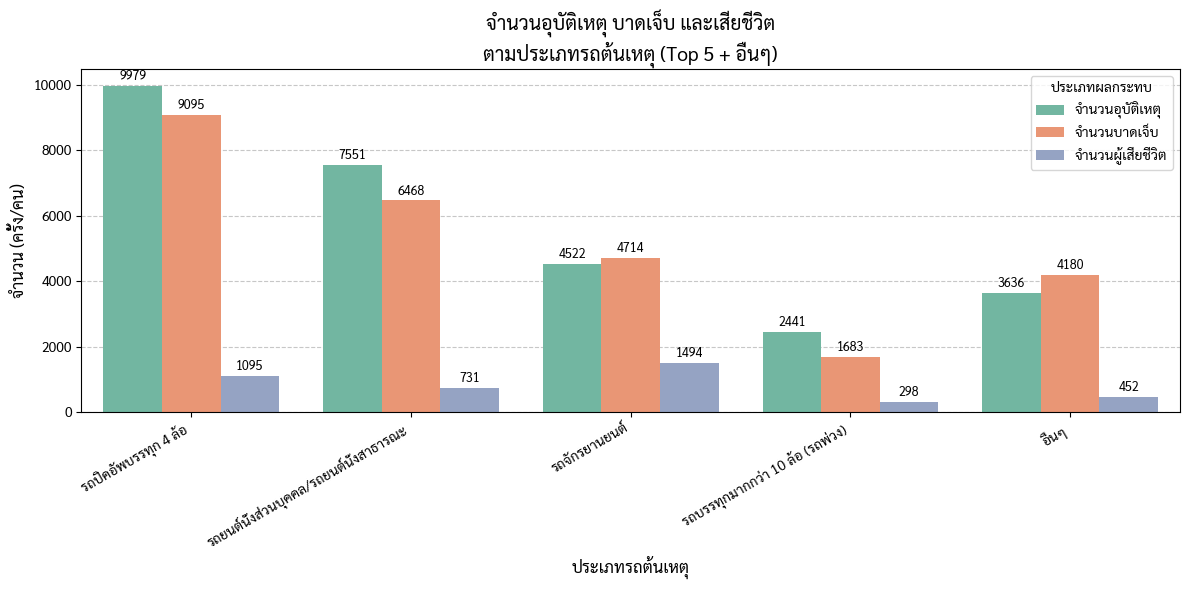

In [ ]:
# ระบุคอลัมน์ประเภทรถต้นเหตุที่ต้องวิเคราะห์
vehicle_cols = [
    'รถจักรยานยนต์',
    'รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ',
    'รถปิคอัพบรรทุก 4 ล้อ',
    'รถตู้',
    'รถบรรทุก 6 ล้อ',
    'รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)',
    'อื่นๆ'
]

# สร้าง summary
vehicle_summary = pd.DataFrame(index=vehicle_cols)
vehicle_summary['จำนวนอุบัติเหตุ'] = df[vehicle_cols].apply(lambda col: (col > 0).sum())

vehicle_summary['จำนวนบาดเจ็บ'] = [
    df.loc[df[vc] > 0, 'จำนวนผู้บาดเจ็บสาหัส'].sum() +
    df.loc[df[vc] > 0, 'จำนวนผู้บาดเจ็บเล็กน้อย'].sum()
    for vc in vehicle_cols
]

vehicle_summary['จำนวนผู้เสียชีวิต'] = [
    df.loc[df[vc] > 0, 'จำนวนผู้เสียชีวิต'].sum()
    for vc in vehicle_cols
]

vehicle_summary = vehicle_summary.reset_index().rename(columns={'index': 'ประเภทรถต้นเหตุ'})

# ✅ แยก Top 5 + อื่นๆ
top5_vehicles = vehicle_summary.sort_values(by='จำนวนอุบัติเหตุ', ascending=False).head(5)['ประเภทรถต้นเหตุ'].tolist()
vehicle_summary['รถ_จำแนก'] = vehicle_summary['ประเภทรถต้นเหตุ'].apply(lambda x: x if x in top5_vehicles else 'อื่นๆ')

# รวมกลุ่มใหม่
grouped_vehicle = vehicle_summary.groupby('รถ_จำแนก')[['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต']].sum().reset_index()

# Melt สำหรับ seaborn
vehicle_melted_top5 = grouped_vehicle.melt(
    id_vars='รถ_จำแนก',
    value_vars=['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต'],
    var_name='ประเภทผลกระทบ', value_name='จำนวน'
)

# ✅ จัดลำดับ: เรียงตามจำนวนอุบัติเหตุ และเอา "อื่นๆ" ไว้ท้าย
x_order = grouped_vehicle.sort_values(by='จำนวนอุบัติเหตุ', ascending=False)['รถ_จำแนก'].tolist()
others = [x for x in x_order if 'อื่น' in x]
main_labels = [x for x in x_order if x not in others]
x_order = main_labels + others

# วาดกราฟ
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")

ax = sns.barplot(
    data=vehicle_melted_top5,
    x="รถ_จำแนก",
    y="จำนวน",
    hue="ประเภทผลกระทบ",
    order=x_order
)

# ใส่ตัวเลขบนแท่ง
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=9, padding=2)

ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.title("จำนวนอุบัติเหตุ บาดเจ็บ และเสียชีวิต\nตามประเภทรถต้นเหตุ (Top 5 + อื่นๆ)", fontsize=14)
plt.xlabel("ประเภทรถต้นเหตุ", fontsize=12)
plt.ylabel("จำนวน (ครั้ง/คน)", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title="ประเภทผลกระทบ", loc='upper right')

plt.tight_layout()
plt.show()

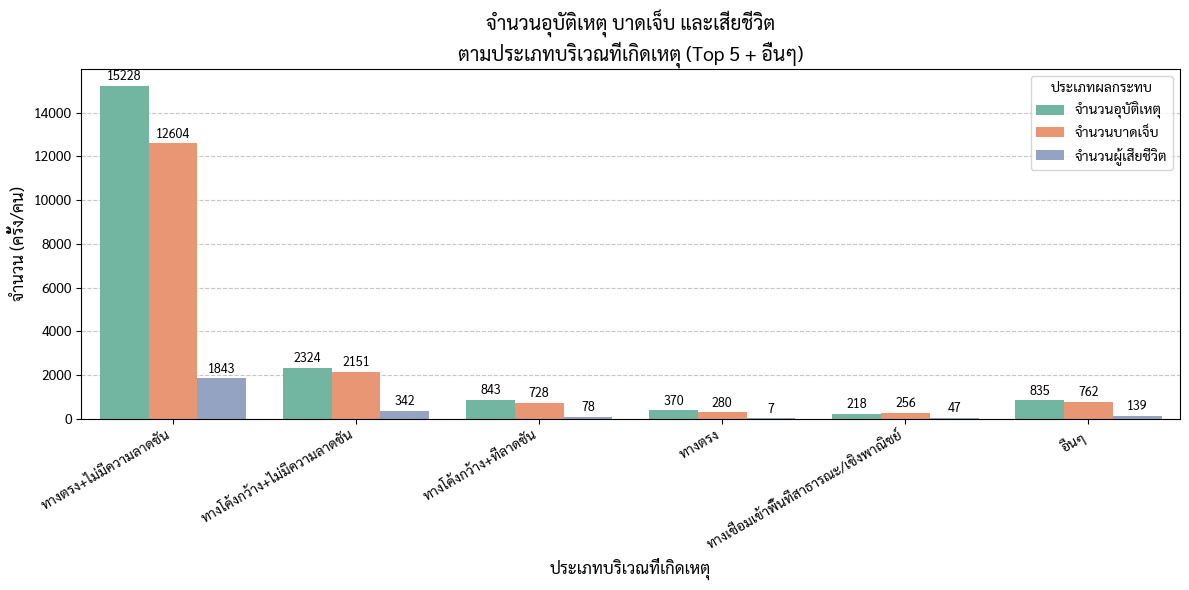

In [9]:
# เตรียมข้อมูล
place_col = 'บริเวณที่เกิดเหตุ/ลักษณะทาง'
df_place = df.dropna(subset=[place_col])

# สรุปจำนวนตามบริเวณ
place_summary = df_place.groupby(place_col).agg({
    'ACC_CODE': 'count',
    'จำนวนผู้บาดเจ็บสาหัส': 'sum',
    'จำนวนผู้บาดเจ็บเล็กน้อย': 'sum',
    'จำนวนผู้เสียชีวิต': 'sum'
}).rename(columns={'ACC_CODE': 'จำนวนอุบัติเหตุ'})

place_summary['จำนวนบาดเจ็บ'] = place_summary['จำนวนผู้บาดเจ็บสาหัส'] + place_summary['จำนวนผู้บาดเจ็บเล็กน้อย']
place_summary = place_summary[['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต']].reset_index()

# ✅ คัด Top 5 แล้วรวมเป็น "อื่นๆ"
top5_places = place_summary.sort_values(by='จำนวนอุบัติเหตุ', ascending=False).head(5)[place_col].tolist()
place_summary['บริเวณ_จำแนก'] = place_summary[place_col].apply(lambda x: x if x in top5_places else 'อื่นๆ')

# รวมกลุ่มใหม่
grouped = place_summary.groupby('บริเวณ_จำแนก')[['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต']].sum().reset_index()

# Melt สำหรับ seaborn
place_melted_top5 = grouped.melt(id_vars='บริเวณ_จำแนก',
                                 value_vars=['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต'],
                                 var_name='ประเภทผลกระทบ', value_name='จำนวน')


# เรียงตามจำนวนอุบัติเหตุ จากมากไปน้อย
x_order = grouped.sort_values(by='จำนวนอุบัติเหตุ', ascending=False)['บริเวณ_จำแนก'].tolist()

# แยก "อื่นๆ" ไปไว้ท้ายสุด
others = [x for x in x_order if 'อื่น' in x]
main_labels = [x for x in x_order if x not in others]
x_order = main_labels + others
# วาดกราฟ
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")

ax = sns.barplot(
    data=place_melted_top5,
    x="บริเวณ_จำแนก",
    y="จำนวน",
    hue="ประเภทผลกระทบ",
    order=x_order
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=9, padding=2)

ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.title("จำนวนอุบัติเหตุ บาดเจ็บ และเสียชีวิต\nตามประเภทบริเวณที่เกิดเหตุ (Top 5 + อื่นๆ)", fontsize=14)
plt.xlabel("ประเภทบริเวณที่เกิดเหตุ", fontsize=12)
plt.ylabel("จำนวน (ครั้ง/คน)", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title="ประเภทผลกระทบ", loc='upper right')

plt.tight_layout()
plt.show()

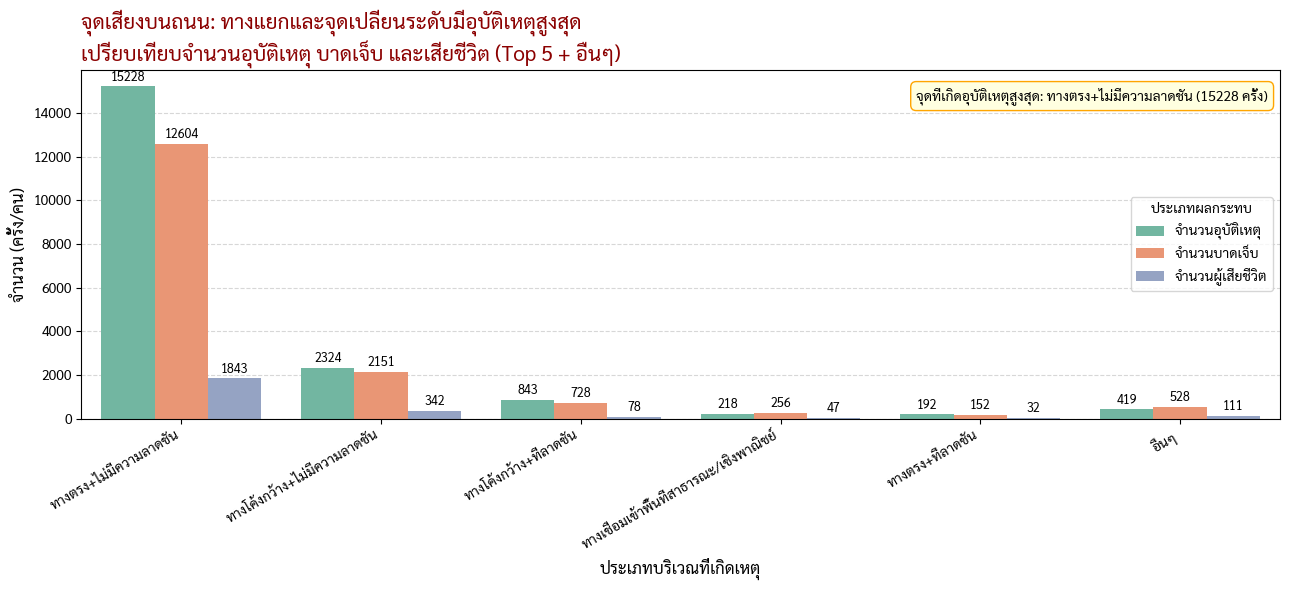

In [ ]:
# เตรียมข้อมูล
place_col = 'บริเวณที่เกิดเหตุ/ลักษณะทาง'
df_place = df.dropna(subset=[place_col])

# สรุปจำนวนตามบริเวณ
place_summary = df_place.groupby(place_col).agg({
    'ACC_CODE': 'count',
    'จำนวนผู้บาดเจ็บสาหัส': 'sum',
    'จำนวนผู้บาดเจ็บเล็กน้อย': 'sum',
    'จำนวนผู้เสียชีวิต': 'sum'
}).rename(columns={'ACC_CODE': 'จำนวนอุบัติเหตุ'})

place_summary['จำนวนบาดเจ็บ'] = place_summary['จำนวนผู้บาดเจ็บสาหัส'] + place_summary['จำนวนผู้บาดเจ็บเล็กน้อย']
place_summary = place_summary[['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต']].reset_index()

# ✅ คัด Top 5 แล้วรวมเป็น "อื่นๆ"
top5_places = place_summary.sort_values(by='จำนวนอุบัติเหตุ', ascending=False).head(5)[place_col].tolist()
place_summary['บริเวณ_จำแนก'] = place_summary[place_col].apply(lambda x: x if x in top5_places else 'อื่นๆ')

# รวมกลุ่มใหม่
grouped = place_summary.groupby('บริเวณ_จำแนก')[['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต']].sum().reset_index()

# Melt สำหรับ seaborn
place_melted_top5 = grouped.melt(id_vars='บริเวณ_จำแนก',
                                 value_vars=['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต'],
                                 var_name='ประเภทผลกระทบ', value_name='จำนวน')

# ✅ เรียงลำดับแกน X
x_order = grouped.sort_values(by='จำนวนอุบัติเหตุ', ascending=False)['บริเวณ_จำแนก'].tolist()
others = [x for x in x_order if 'อื่น' in x]
main_labels = [x for x in x_order if x not in others]
x_order = main_labels + others

# ✅ วาดกราฟแบบปรับแต่งให้น่าสนใจขึ้น (คล้ายสไตล์ SCB EASY)
plt.figure(figsize=(13, 6))
sns.set_palette("Set2")

ax = sns.barplot(
    data=place_melted_top5,
    x="บริเวณ_จำแนก",
    y="จำนวน",
    hue="ประเภทผลกระทบ",
    order=x_order
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=9, padding=2)

ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

# Title ชูจุดเด่น
plt.title("จุดเสี่ยงบนถนน: ทางแยกและจุดเปลี่ยนระดับมีอุบัติเหตุสูงสุด\nเปรียบเทียบจำนวนอุบัติเหตุ บาดเจ็บ และเสียชีวิต (Top 5 + อื่นๆ)",
          fontsize=15, loc='left', color='darkred')

# แกนและคำอธิบาย
plt.xlabel("ประเภทบริเวณที่เกิดเหตุ", fontsize=12)
plt.ylabel("จำนวน (ครั้ง/คน)", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title="ประเภทผลกระทบ", loc='center right', frameon=True)

# Annotation: บริเวณที่เกิดเหตุสูงสุด
top_place = grouped.sort_values(by='จำนวนอุบัติเหตุ', ascending=False).iloc[0]
note = f"จุดที่เกิดอุบัติเหตุสูงสุด: {top_place['บริเวณ_จำแนก']} ({top_place['จำนวนอุบัติเหตุ']} ครั้ง)"
plt.text(0.99, 0.95, note, transform=plt.gca().transAxes,
         fontsize=10, color="black", ha="right", va="top",
         bbox=dict(facecolor="lightyellow", edgecolor="orange", boxstyle="round,pad=0.4"))

plt.tight_layout()
plt.show()

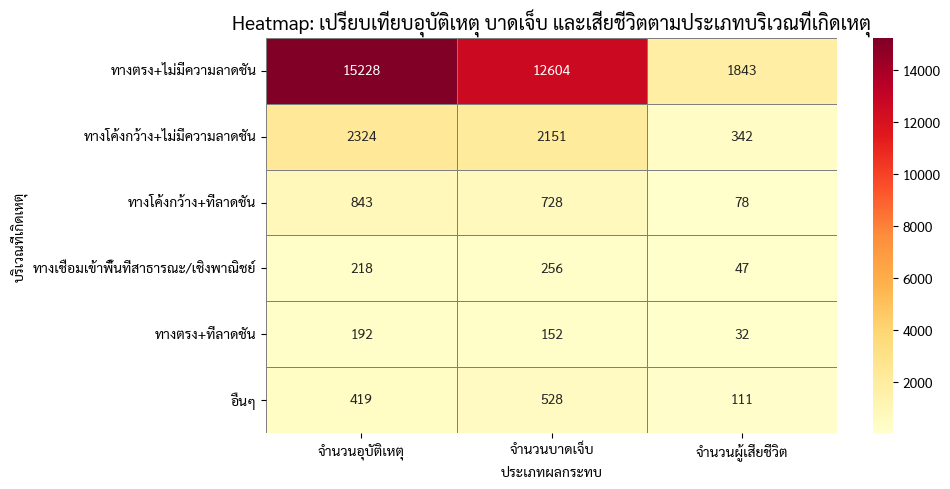

In [ ]:
# เตรียมข้อมูล Heatmap: Pivot ให้ "บริเวณ X ประเภทผลกระทบ"

# ใช้ข้อมูลจาก grouped (Top 5 + อื่นๆ)
heatmap_data = grouped.set_index('บริเวณ_จำแนก')[['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต']]

# จัดลำดับ index ให้อื่นๆ อยู่ท้าย
index_order = heatmap_data.sort_values(by='จำนวนอุบัติเหตุ', ascending=False).index.tolist()
others = [x for x in index_order if 'อื่น' in x]
main_labels = [x for x in index_order if x not in others]
index_order = main_labels + others
heatmap_data = heatmap_data.loc[index_order]

# วาด Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd", linewidths=0.5, linecolor='gray')

plt.title("Heatmap: เปรียบเทียบอุบัติเหตุ บาดเจ็บ และเสียชีวิตตามประเภทบริเวณที่เกิดเหตุ", fontsize=14)
plt.xlabel("ประเภทผลกระทบ")
plt.ylabel("บริเวณที่เกิดเหตุ")
plt.tight_layout()
plt.show()


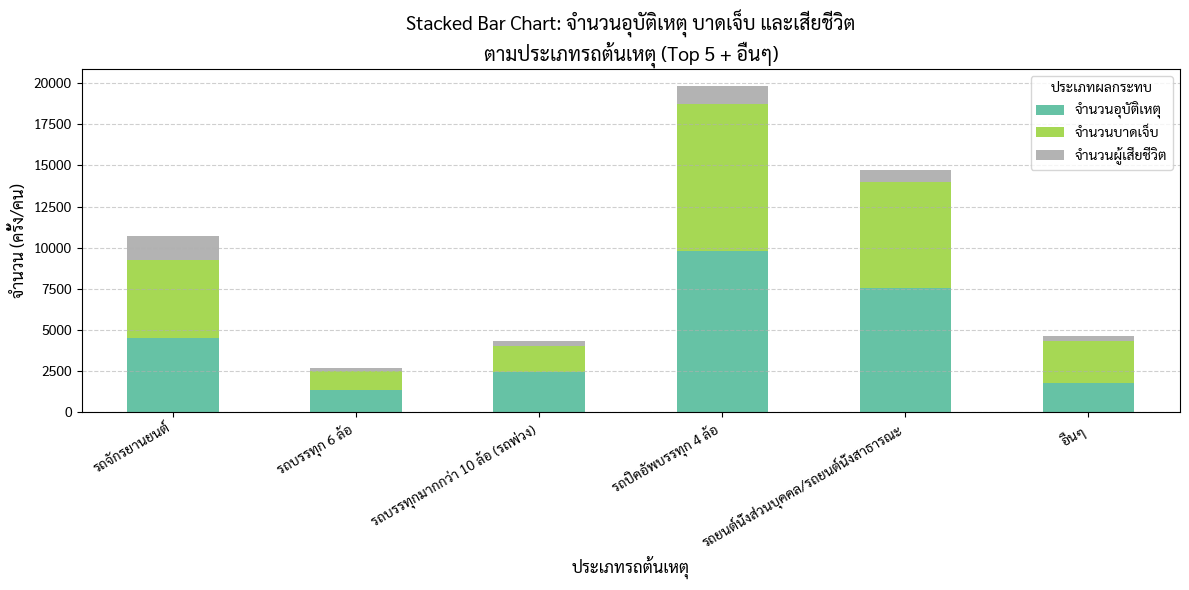

In [70]:
# เตรียมข้อมูลใหม่สำหรับประเภทรถต้นเหตุ
vehicle_cols = [
    'รถจักรยานยนต์',
    'รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ',
    'รถปิคอัพบรรทุก 4 ล้อ',
    'รถตู้',
    'รถบรรทุก 6 ล้อ',
    'รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)',
    'อื่นๆ'
]

# สร้าง summary
vehicle_summary = pd.DataFrame(index=vehicle_cols)
vehicle_summary['จำนวนอุบัติเหตุ'] = df[vehicle_cols].apply(lambda col: (col > 0).sum())

vehicle_summary['จำนวนบาดเจ็บ'] = [
    df.loc[df[vc] > 0, 'จำนวนผู้บาดเจ็บสาหัส'].sum() +
    df.loc[df[vc] > 0, 'จำนวนผู้บาดเจ็บเล็กน้อย'].sum()
    for vc in vehicle_cols
]

vehicle_summary['จำนวนผู้เสียชีวิต'] = [
    df.loc[df[vc] > 0, 'จำนวนผู้เสียชีวิต'].sum()
    for vc in vehicle_cols
]

vehicle_summary = vehicle_summary.reset_index().rename(columns={'index': 'ประเภทรถต้นเหตุ'})

# ✅ จัดกลุ่ม Top 5 + อื่นๆ
top5_vehicles = vehicle_summary.sort_values(by='จำนวนอุบัติเหตุ', ascending=False).head(5)['ประเภทรถต้นเหตุ'].tolist()
vehicle_summary['รถ_จำแนก'] = vehicle_summary['ประเภทรถต้นเหตุ'].apply(lambda x: x if x in top5_vehicles else 'อื่นๆ')

# รวมกลุ่มใหม่
grouped_vehicle = vehicle_summary.groupby('รถ_จำแนก')[['จำนวนอุบัติเหตุ', 'จำนวนบาดเจ็บ', 'จำนวนผู้เสียชีวิต']].sum()

# ✅ วาด Stacked Bar Chart
ax = grouped_vehicle.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')

# ปรับแต่ง
plt.title("Stacked Bar Chart: จำนวนอุบัติเหตุ บาดเจ็บ และเสียชีวิต\nตามประเภทรถต้นเหตุ (Top 5 + อื่นๆ)", fontsize=14)
plt.xlabel("ประเภทรถต้นเหตุ", fontsize=12)
plt.ylabel("จำนวน (ครั้ง/คน)", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title="ประเภทผลกระทบ", loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()




---



### 2-1: วิเคราะห์อุบัติเหตุจากมูลเหตุสันนิษฐาน (Presumed Causes)

##### 🔍 Analysis Objective  
- วิเคราะห์ว่าอุบัติเหตุจากสาเหตุแต่ละประเภท เช่น *ขับรถเร็ว*, *หลับใน* ส่งผลรุนแรงต่างกันอย่างไร

##### 📊 Visualization  
- Grouped Bar Chart เปรียบเทียบอุบัติเหตุ บาดเจ็บ และเสียชีวิตในแต่ละมูลเหตุ

##### 📌 Expected Insights  
- สาเหตุไหนที่เกิดบ่อย  
- สาเหตุไหนที่รุนแรงแต่เกิดน้อย  
- เพื่อใช้วางแนวทางป้องกันให้ตรงจุด

In [16]:
plt.figure(figsize=(12, 6))
sns.set_palette("Set2")

# ✅ จัดลำดับแกน X ใหม่: "อื่นๆ" ไปไว้ท้ายสุด
x_order = summary_sorted["มูลเหตุ_จำแนก"].dropna().tolist()

# คัดแยก "อื่นๆ"
others = [x for x in x_order if 'อื่น' in x]
main_causes = [x for x in x_order if x not in others]

# รวมใหม่: ให้ "อื่นๆ" อยู่ท้าย
x_order = main_causes + others

# วาดกราฟ bar chart
ax = sns.barplot(
    data=df_melted_sorted,
    x="มูลเหตุ_จำแนก",
    y="จำนวน",
    hue="ประเภทผลกระทบ",
    order=x_order
)

# ใส่ตัวเลขบนแท่ง
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=9, padding=2)

# เพิ่ม grid แนวนอน
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# คำอธิบายเพิ่มเติม
plt.title("วิเคราะห์จำนวนอุบัติเหตุ บาดเจ็บ และเสียชีวิต\nตามมูลเหตุสันนิษฐาน (5 อันดับ และ อื่นๆ)", fontsize=14)
plt.xlabel("มูลเหตุสันนิษฐาน", fontsize=12)
plt.ylabel("จำนวน (ครั้ง/คน)", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.legend(title="ประเภทผลกระทบ", loc='center right')

# เพิ่มคำอธิบายเด่น
try:
    max_fatal_cause = summary_sorted.loc[summary_sorted["จำนวนเสียชีวิต"].idxmax(), "มูลเหตุ_จำแนก"]
    max_fatal_value = summary_sorted["จำนวนเสียชีวิต"].max()
    note = f"มูลเหตุที่ทำให้เสียชีวิตมากที่สุด: '{max_fatal_cause}' ({max_fatal_value} ราย)"

    plt.text(0.99, 0.98, note, transform=plt.gca().transAxes,
             fontsize=10, color="red", ha="right", va="top",
             bbox=dict(facecolor="mistyrose", edgecolor="red", boxstyle="round,pad=0.3"))
except Exception as e:
    print("⚠️ ไม่สามารถแสดงคำอธิบายบนกราฟได้:", e)

plt.tight_layout()
plt.show()

NameError: name 'summary_sorted' is not defined

<Figure size 1200x600 with 0 Axes>